<h1>Import Packages</h1>

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels
import matplotlib.ticker as ticker
import statsmodels.api as sm
from sklearn import metrics

In [2]:
# matplotlib configuration

plt.rcParams["font.family"] = "serif"
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 150
plt.rcParams['figure.figsize'] = 20, 10

def newfigure(*args, **kwargs):
    fig, ax = plt.subplots(*args, **kwargs)
    for i, a in enumerate(fig.axes):
        a.tick_params(direction='in', top=True, right=True)
        a.grid(which='major', axis='both', linestyle=':',color='gray')
        a.set_facecolor('xkcd:white')
        a.legend()
    return fig, ax

<h1>Import Data</h1>
Import data from the csv backup file (this could also be pulled live from the Google Sheet). The first column containing the datetimes is then specified as a datetime format and made the index column.

In [3]:
#Import data
weather = pd.read_csv("Data Backups/databackup fit.csv")

#remove duplicates
weather = weather[~weather.index.duplicated()]

#Tell code that the first column is a datetime
weather['Datetime'] =  pd.to_datetime(weather['Datetime'])
#Tell code that the first column is the index column
weather = weather.set_index(list(weather)[0])

print(weather.head())

                     Humidity API  Humidity Sensor  Pressure API  \
Datetime                                                           
2019-12-22 12:02:00            75           94.574         985.8   
2019-12-22 12:04:00            75           94.552         985.8   
2019-12-22 12:06:00            75           94.364         985.8   
2019-12-22 12:08:00            75           94.346         985.9   
2019-12-22 12:10:00            75           94.218         985.9   

                     Pressure Sensor  Temperature API  Temperature Sensor  
Datetime                                                                   
2019-12-22 12:02:00           983.07             8.10                8.65  
2019-12-22 12:04:00           983.09             8.11                8.66  
2019-12-22 12:06:00           983.10             8.12                8.68  
2019-12-22 12:08:00           983.10             8.12                8.70  
2019-12-22 12:10:00           983.11             8.13              

<h1>Plot Data</h1>
When plotting the data, we can see some of the differences between the data collected from the API and the sensor. Extremities in the humidity API seem to be much more exaggerated in the API than the sensor. API data appears to be consistently higher for pressure than than the sensor data. And for temperature, sensor data appears to be more exaggerated than for the API data.

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


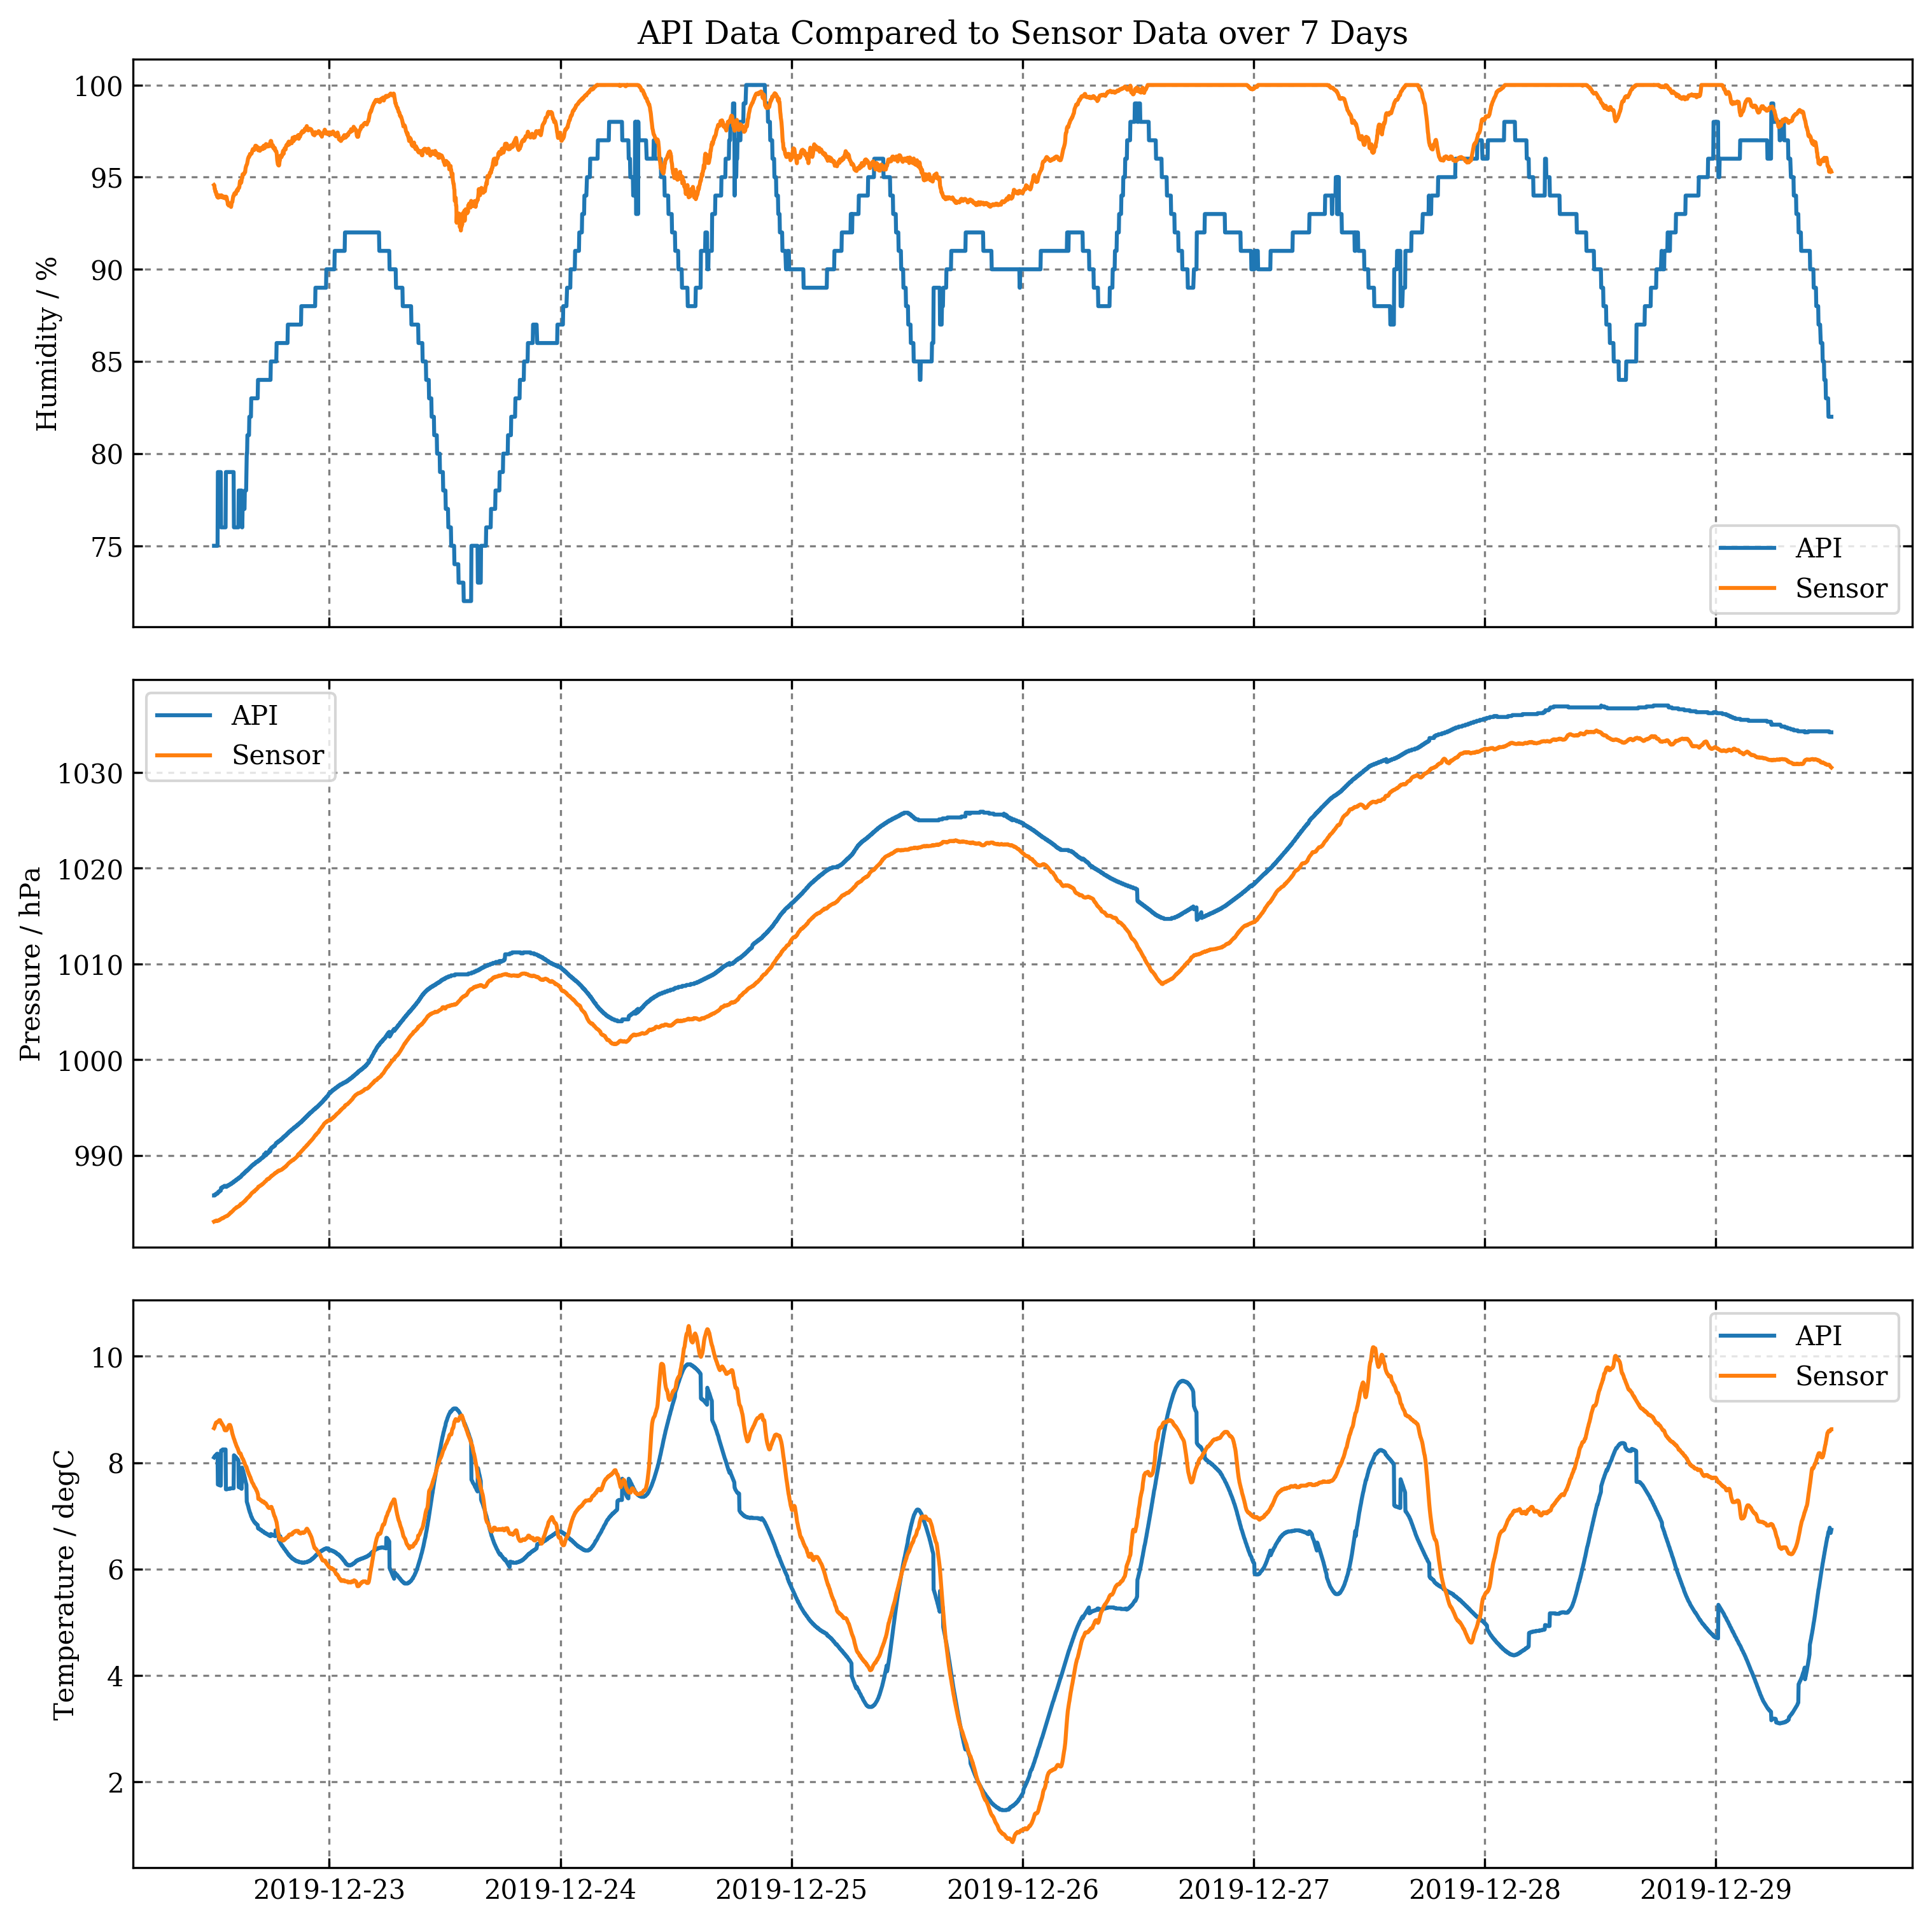

In [4]:
fig, ax = newfigure(3, figsize=(10,10), sharex=True)
fig.tight_layout()

ax[0].plot(weather['Humidity API'],label='API')
ax[0].plot(weather['Humidity Sensor'],label='Sensor')
ax[0].set_ylabel("Humidity / %")
ax[0].legend()

ax[1].plot(weather['Pressure API'],label='API')
ax[1].plot(weather['Pressure Sensor'],label='Sensor')
ax[1].set_ylabel("Pressure / hPa")
ax[1].legend()

ax[2].plot(weather['Temperature API'],label='API')
ax[2].plot(weather['Temperature Sensor'],label='Sensor')
ax[2].set_ylabel("Temperature / degC")
ax[2].legend()

ax[0].set_title("API Data Compared to Sensor Data over 7 Days")
plt.show()
fig.subplots_adjust(left=0.1)
fig.savefig("Figures/fig1.png")

<h1>Decomposition</h1>
The datasets are decomposed into their observed, trend, seasonal, and residual data.

C:\Users\Hayden\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]
C:\Users\Hayden\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


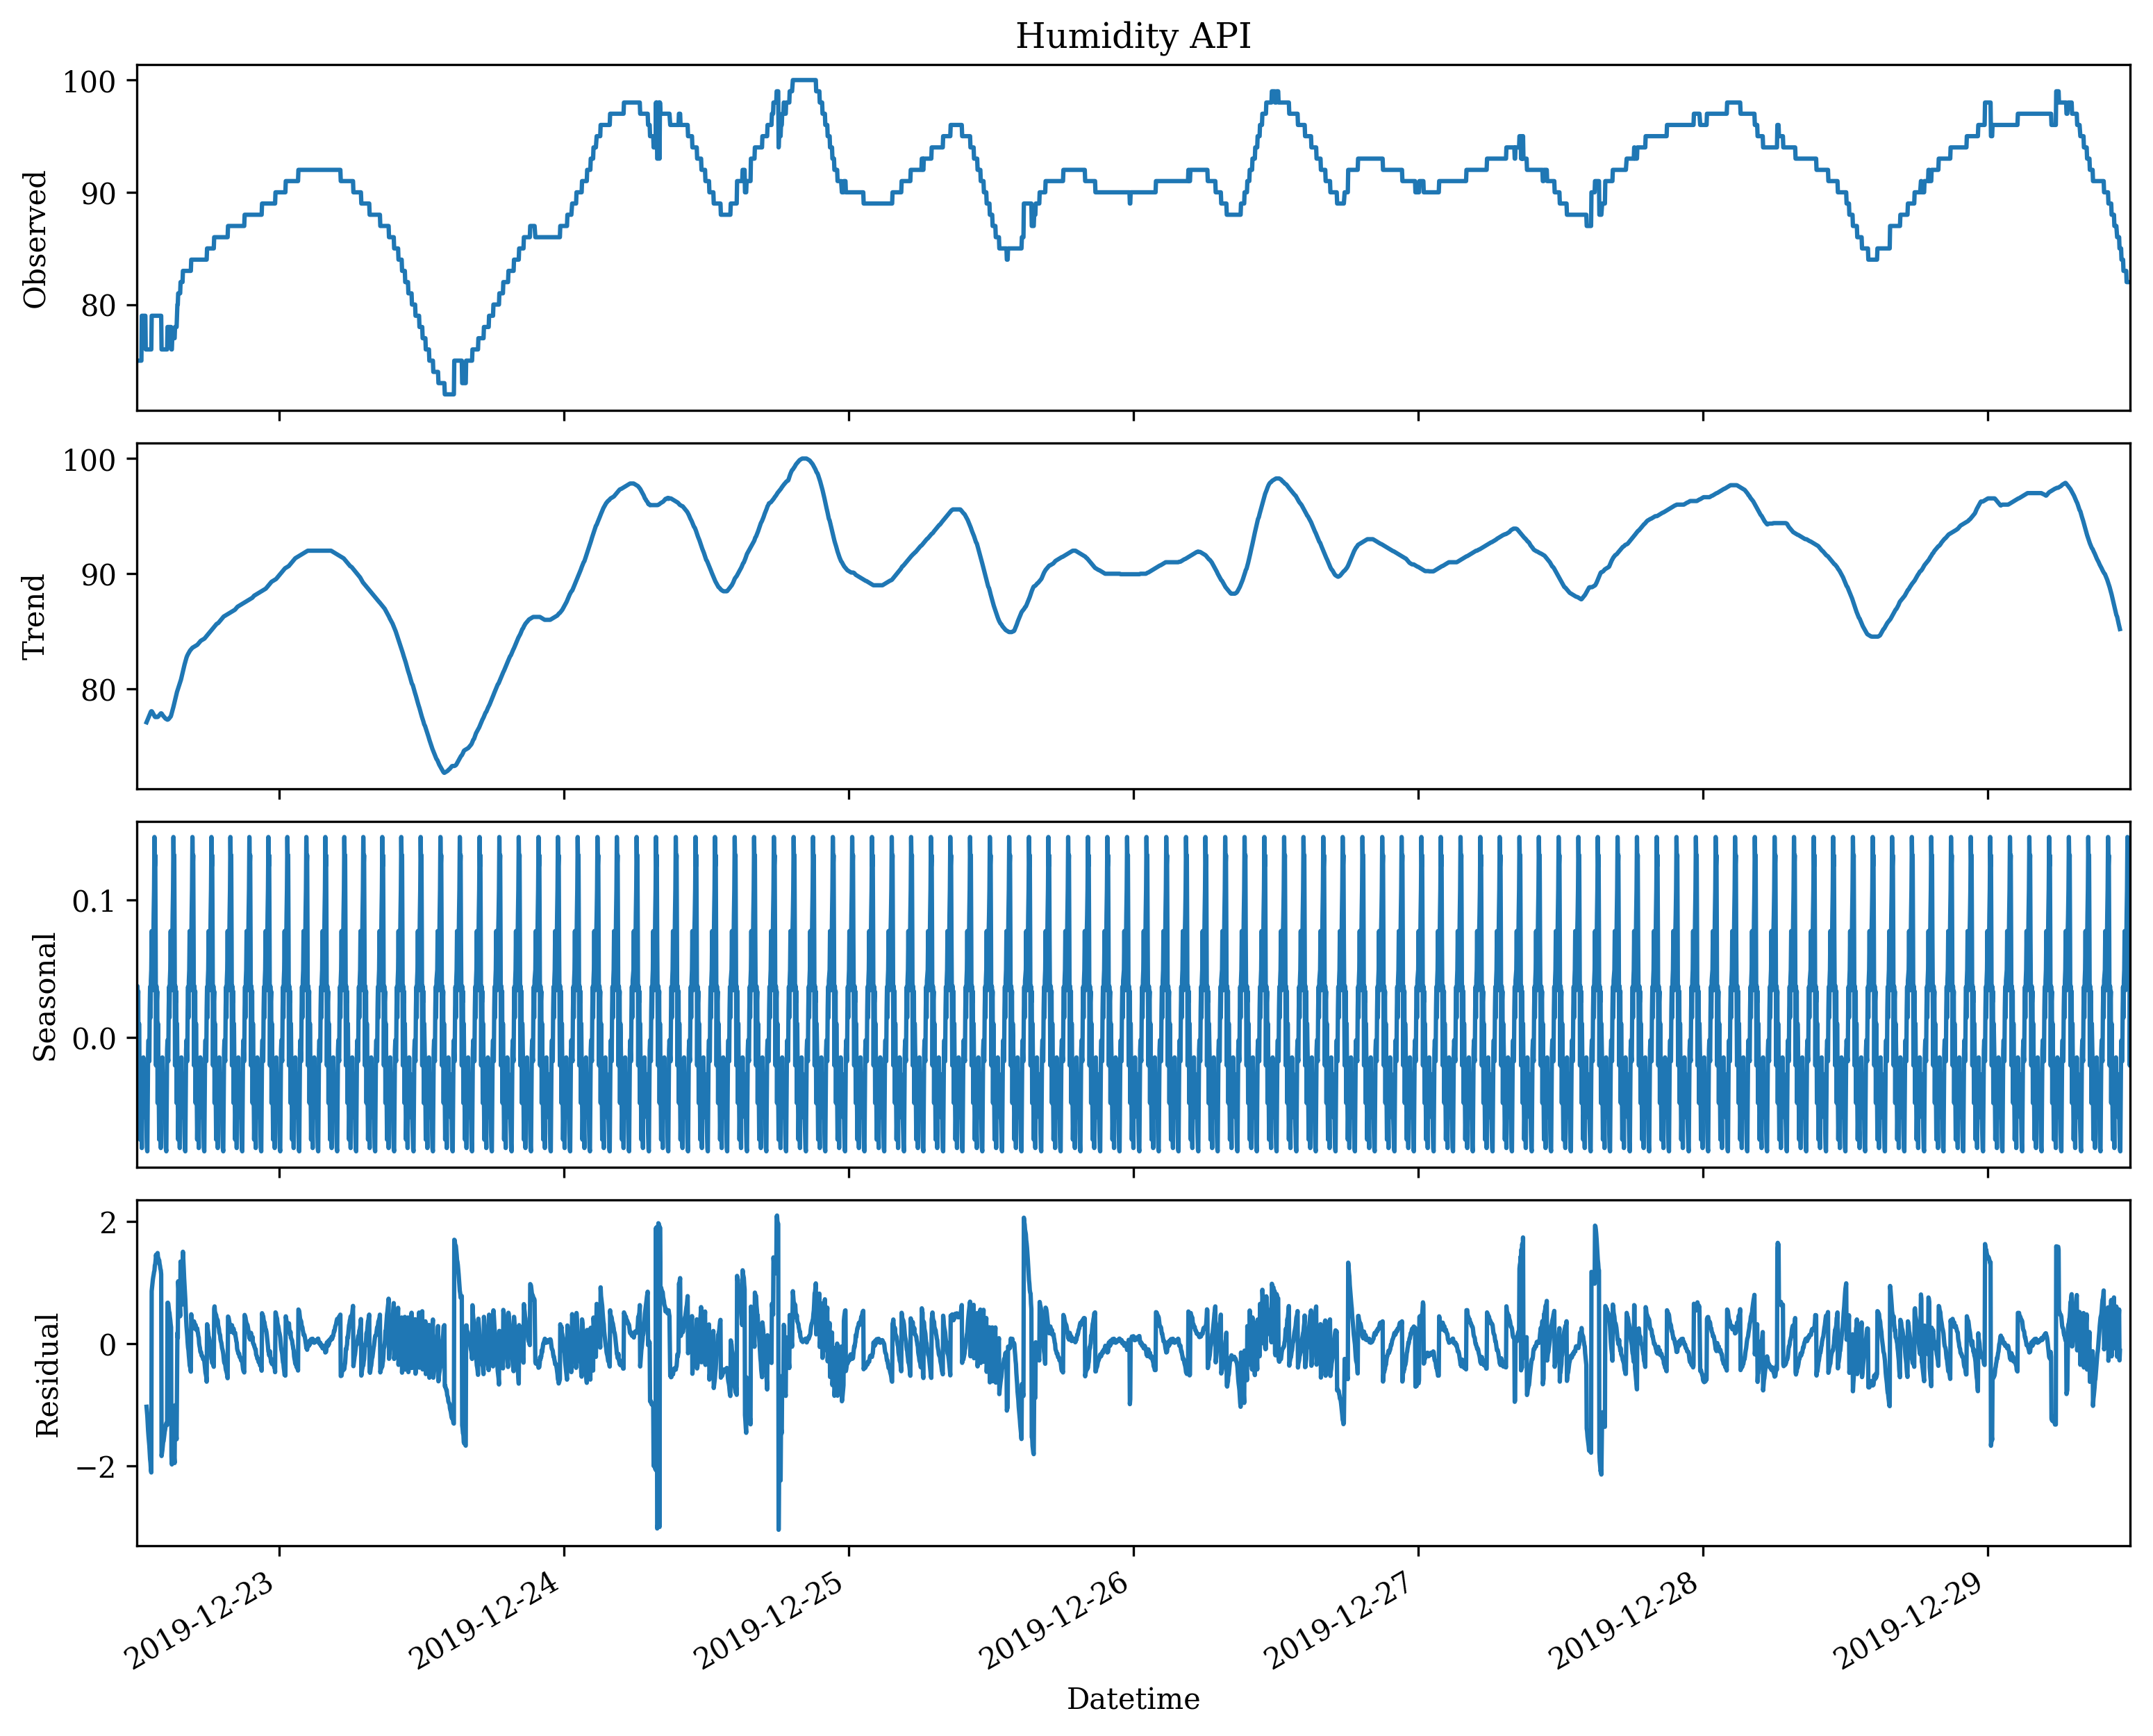

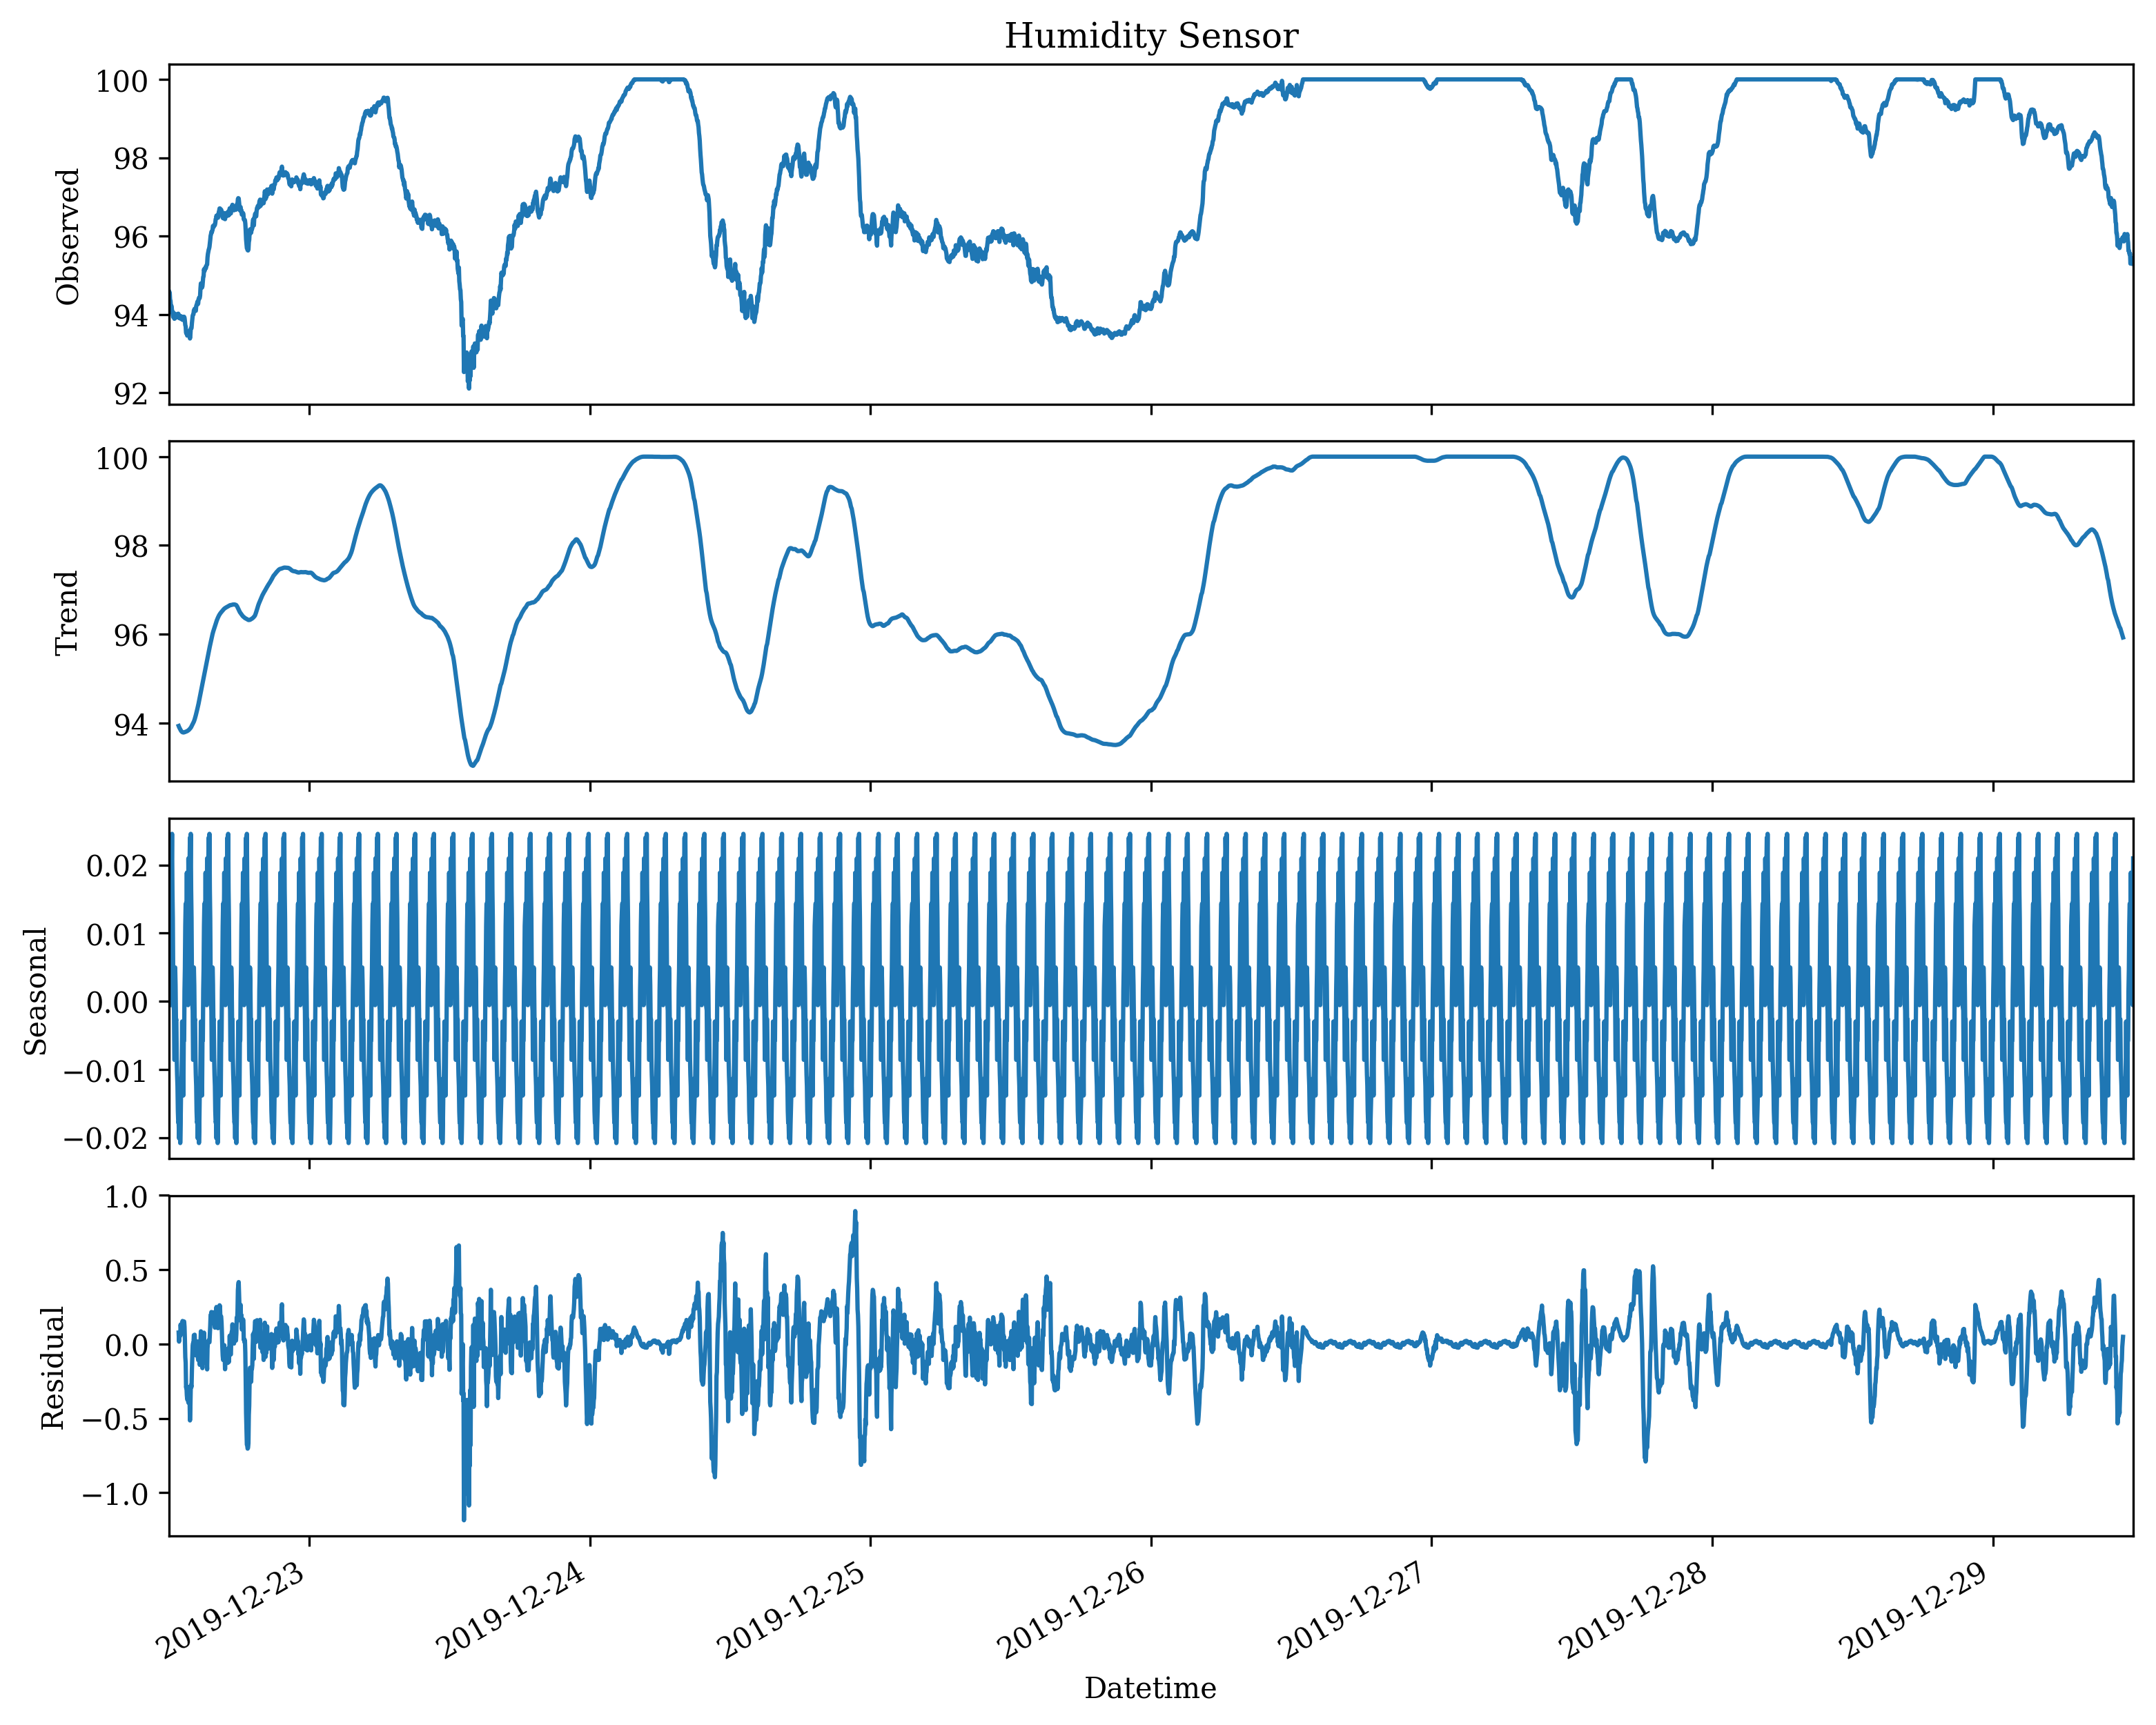

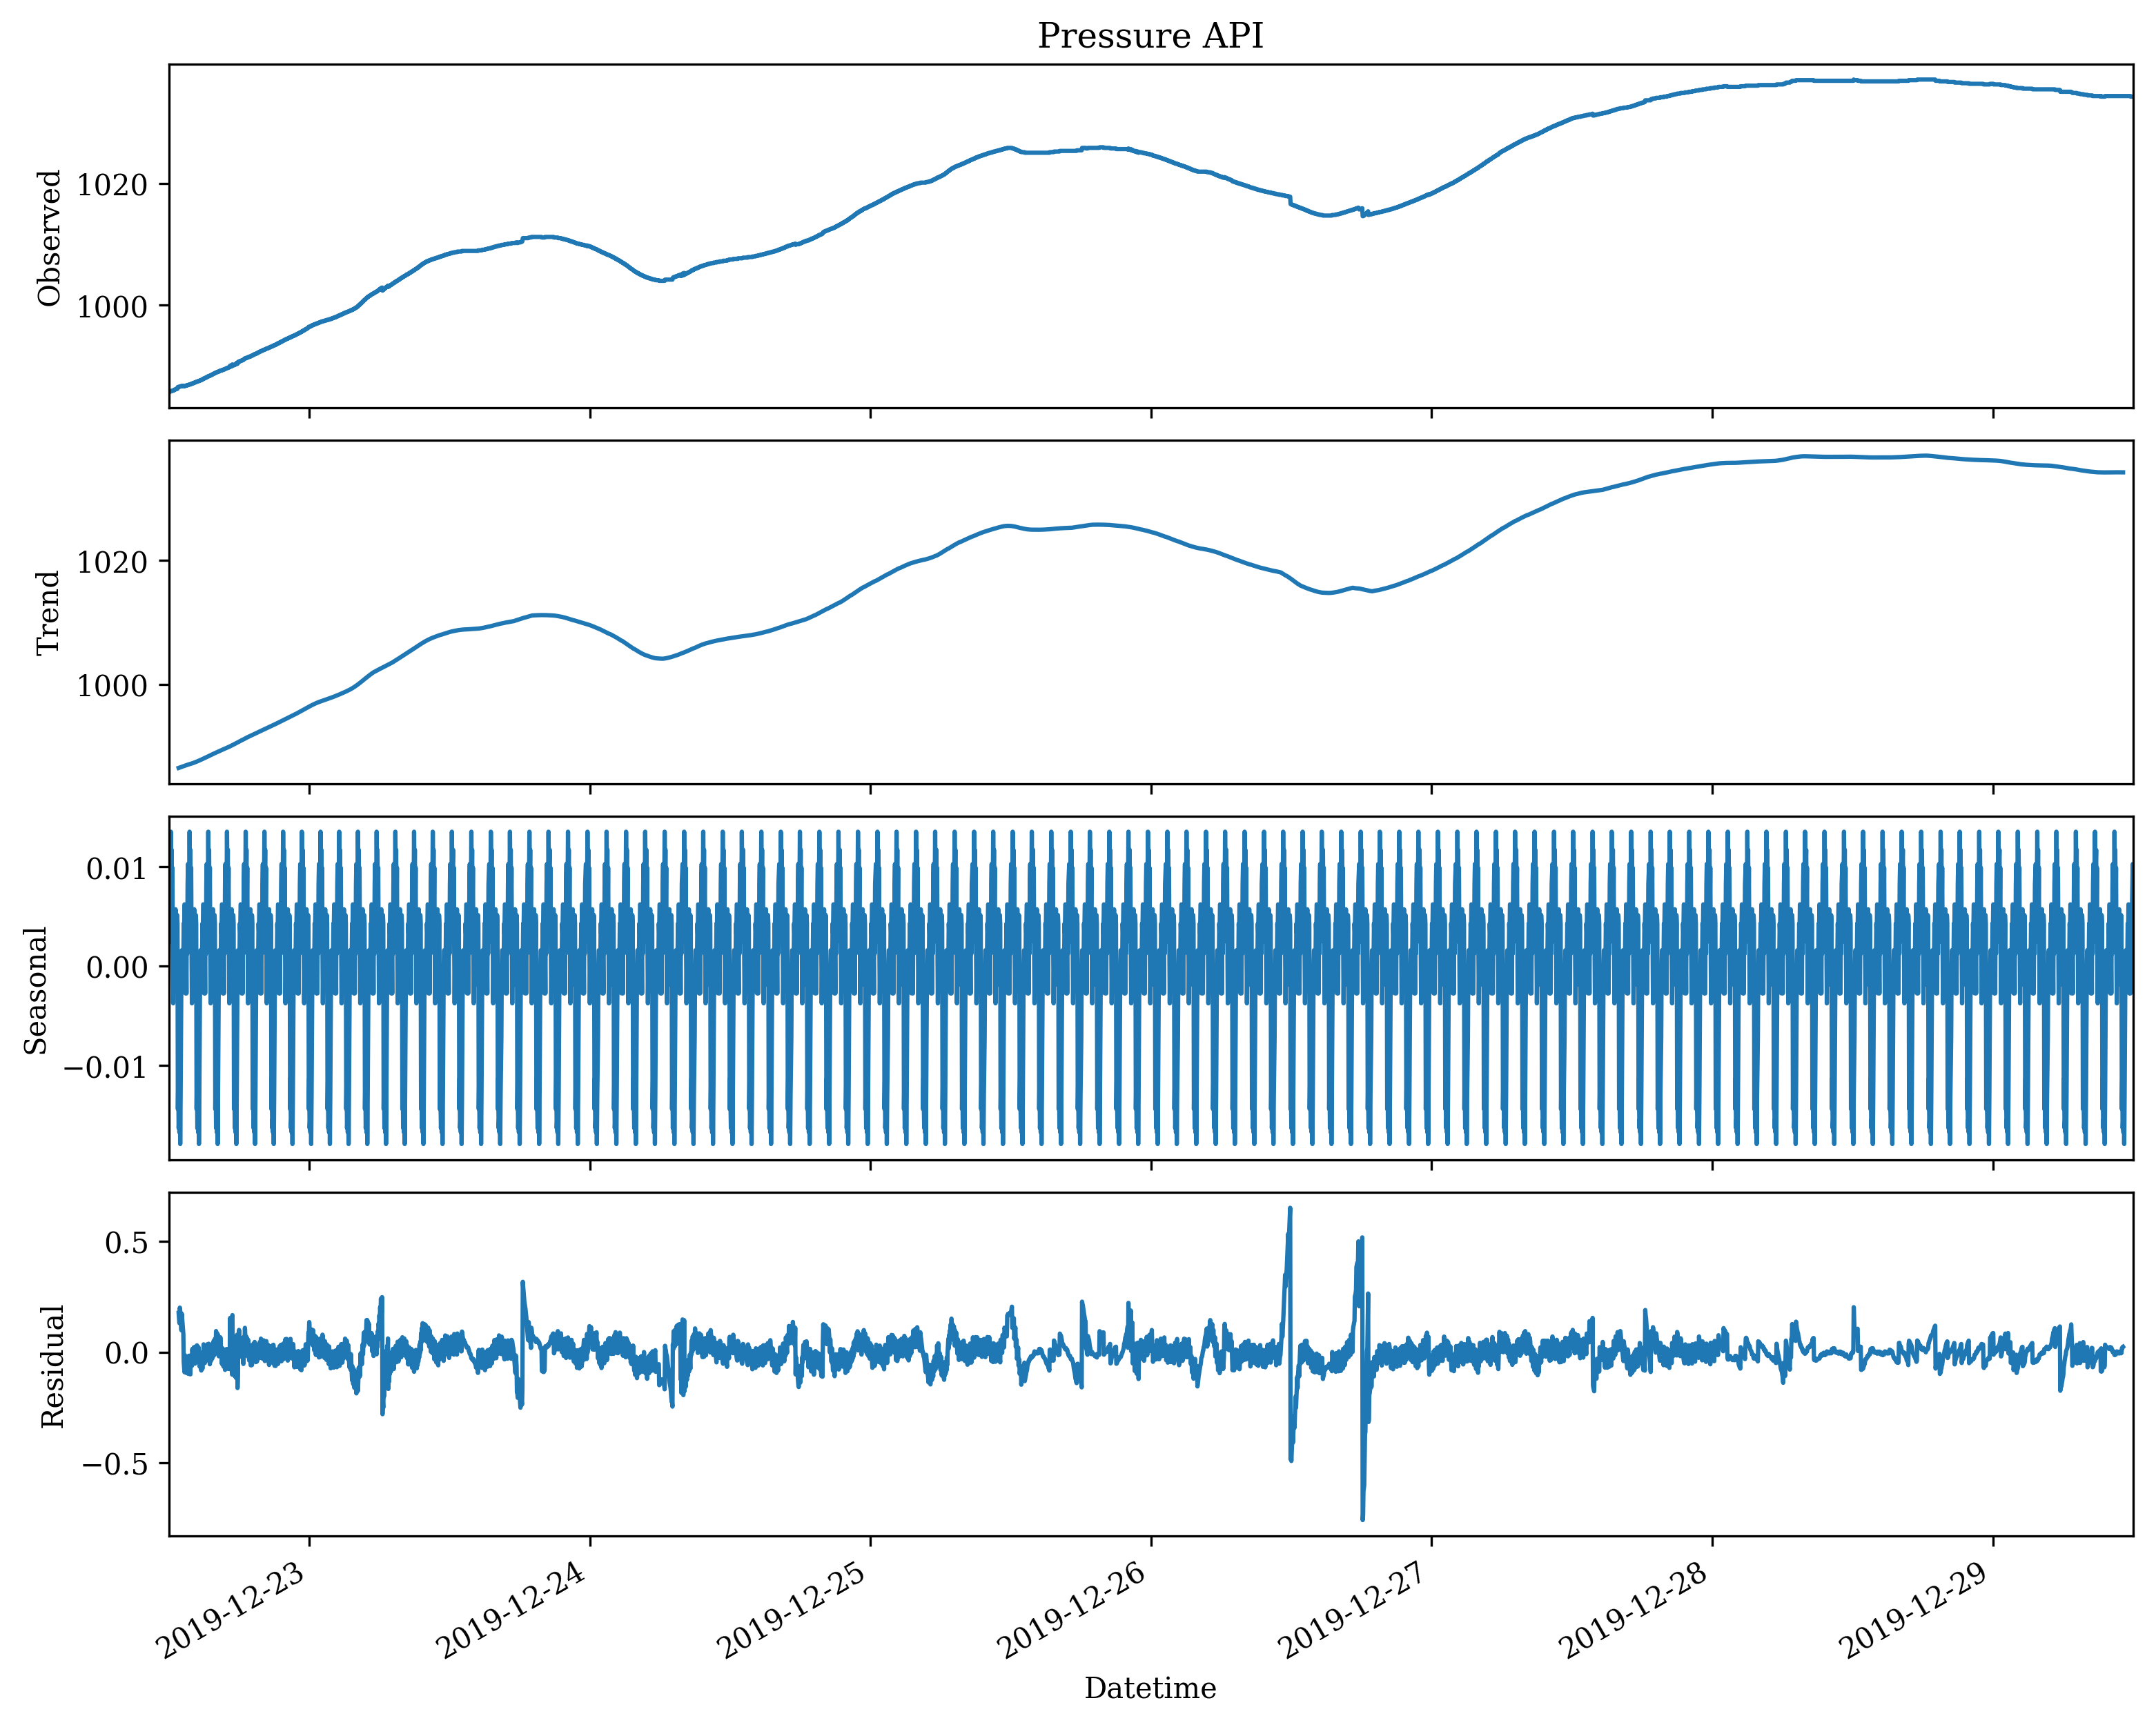

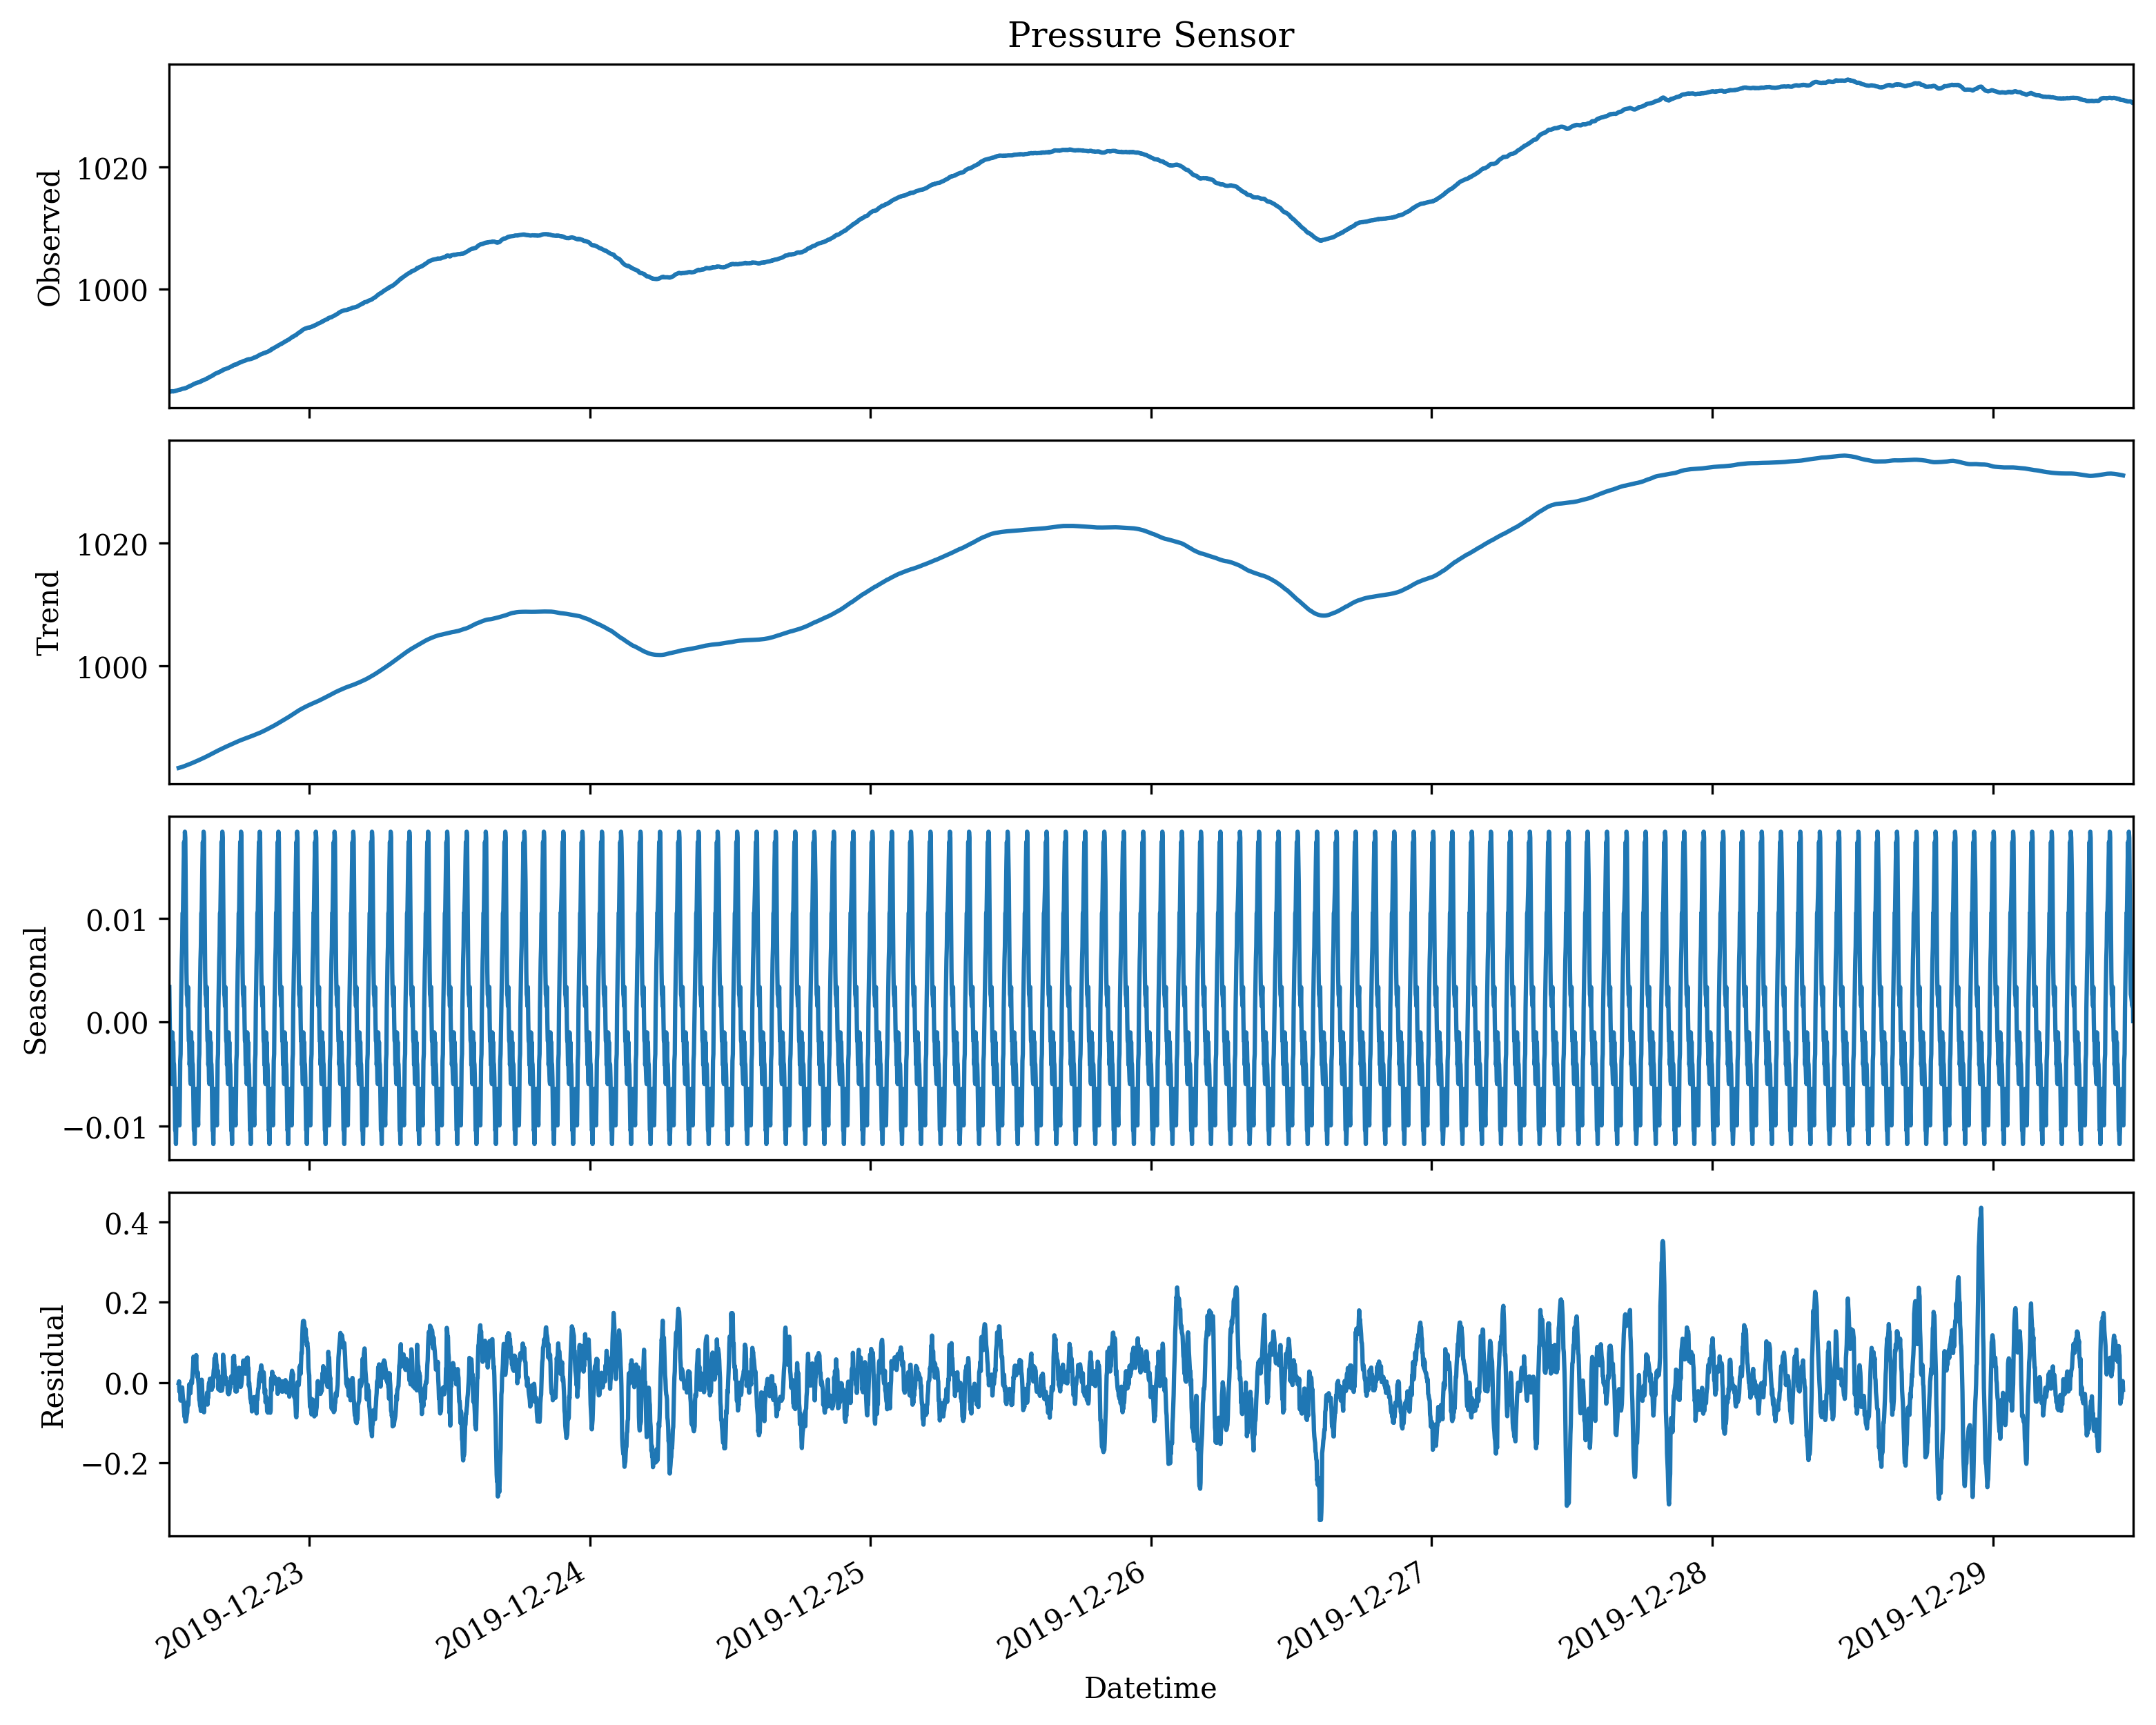

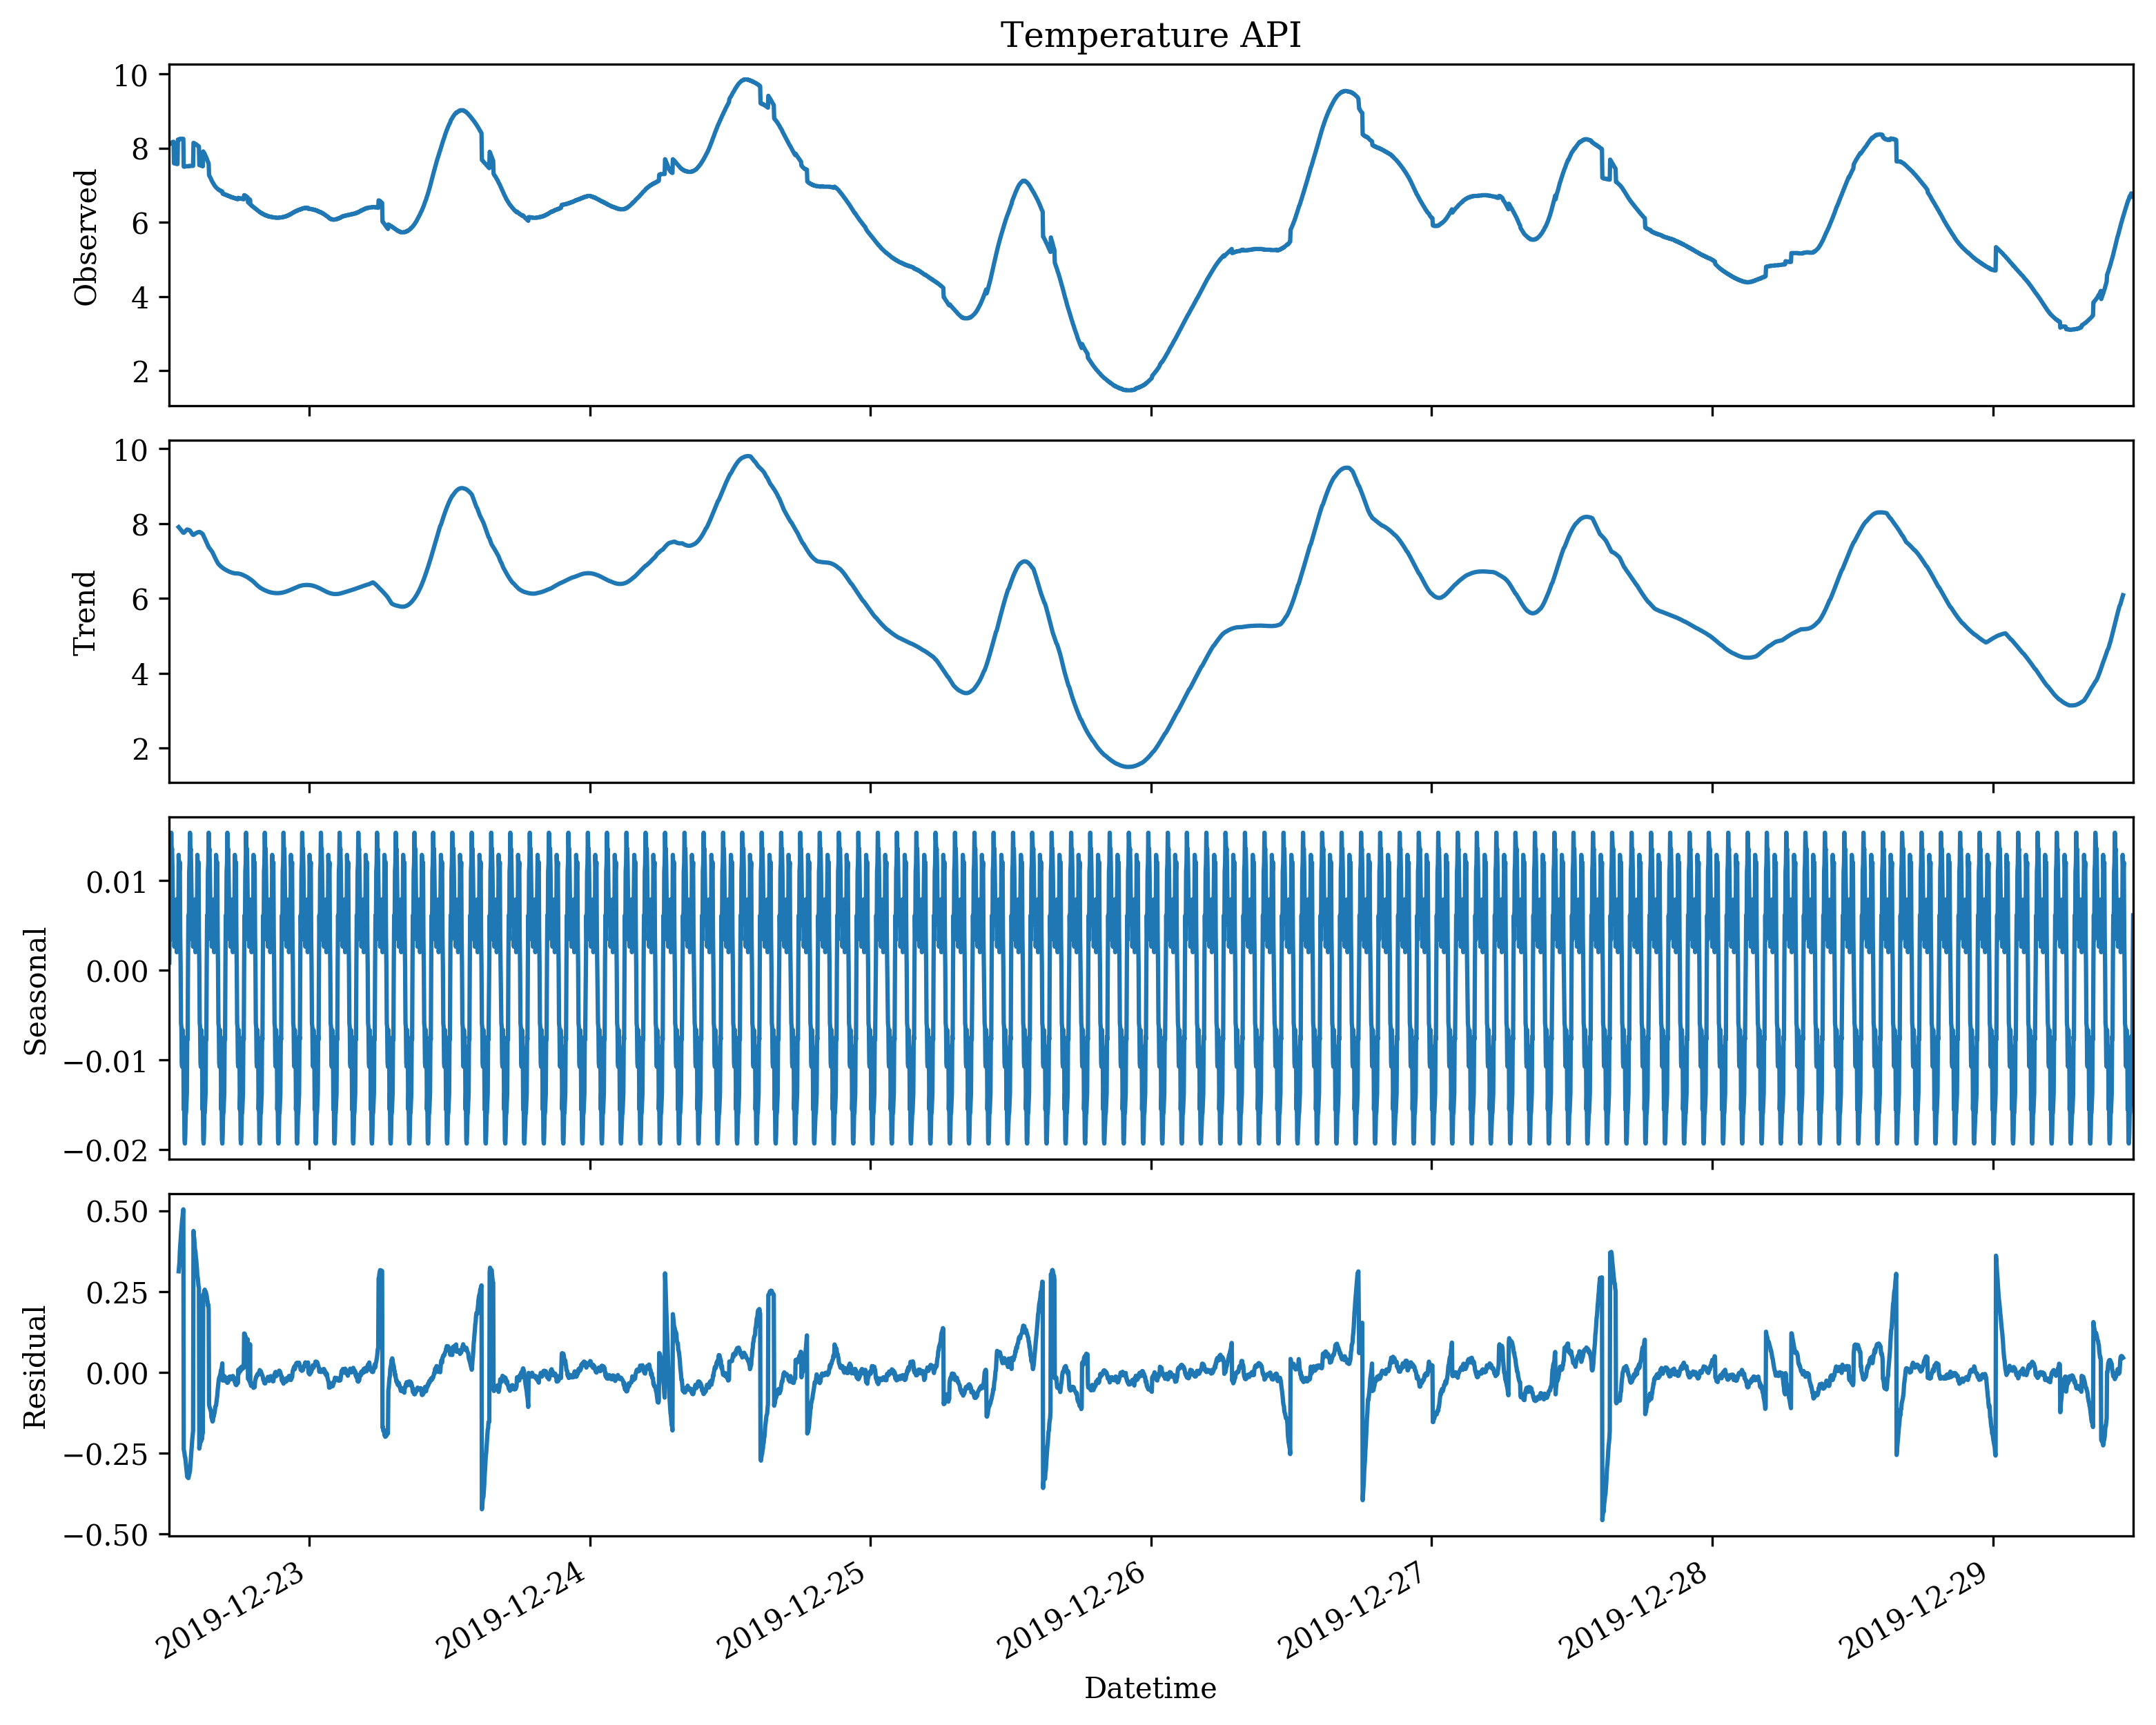

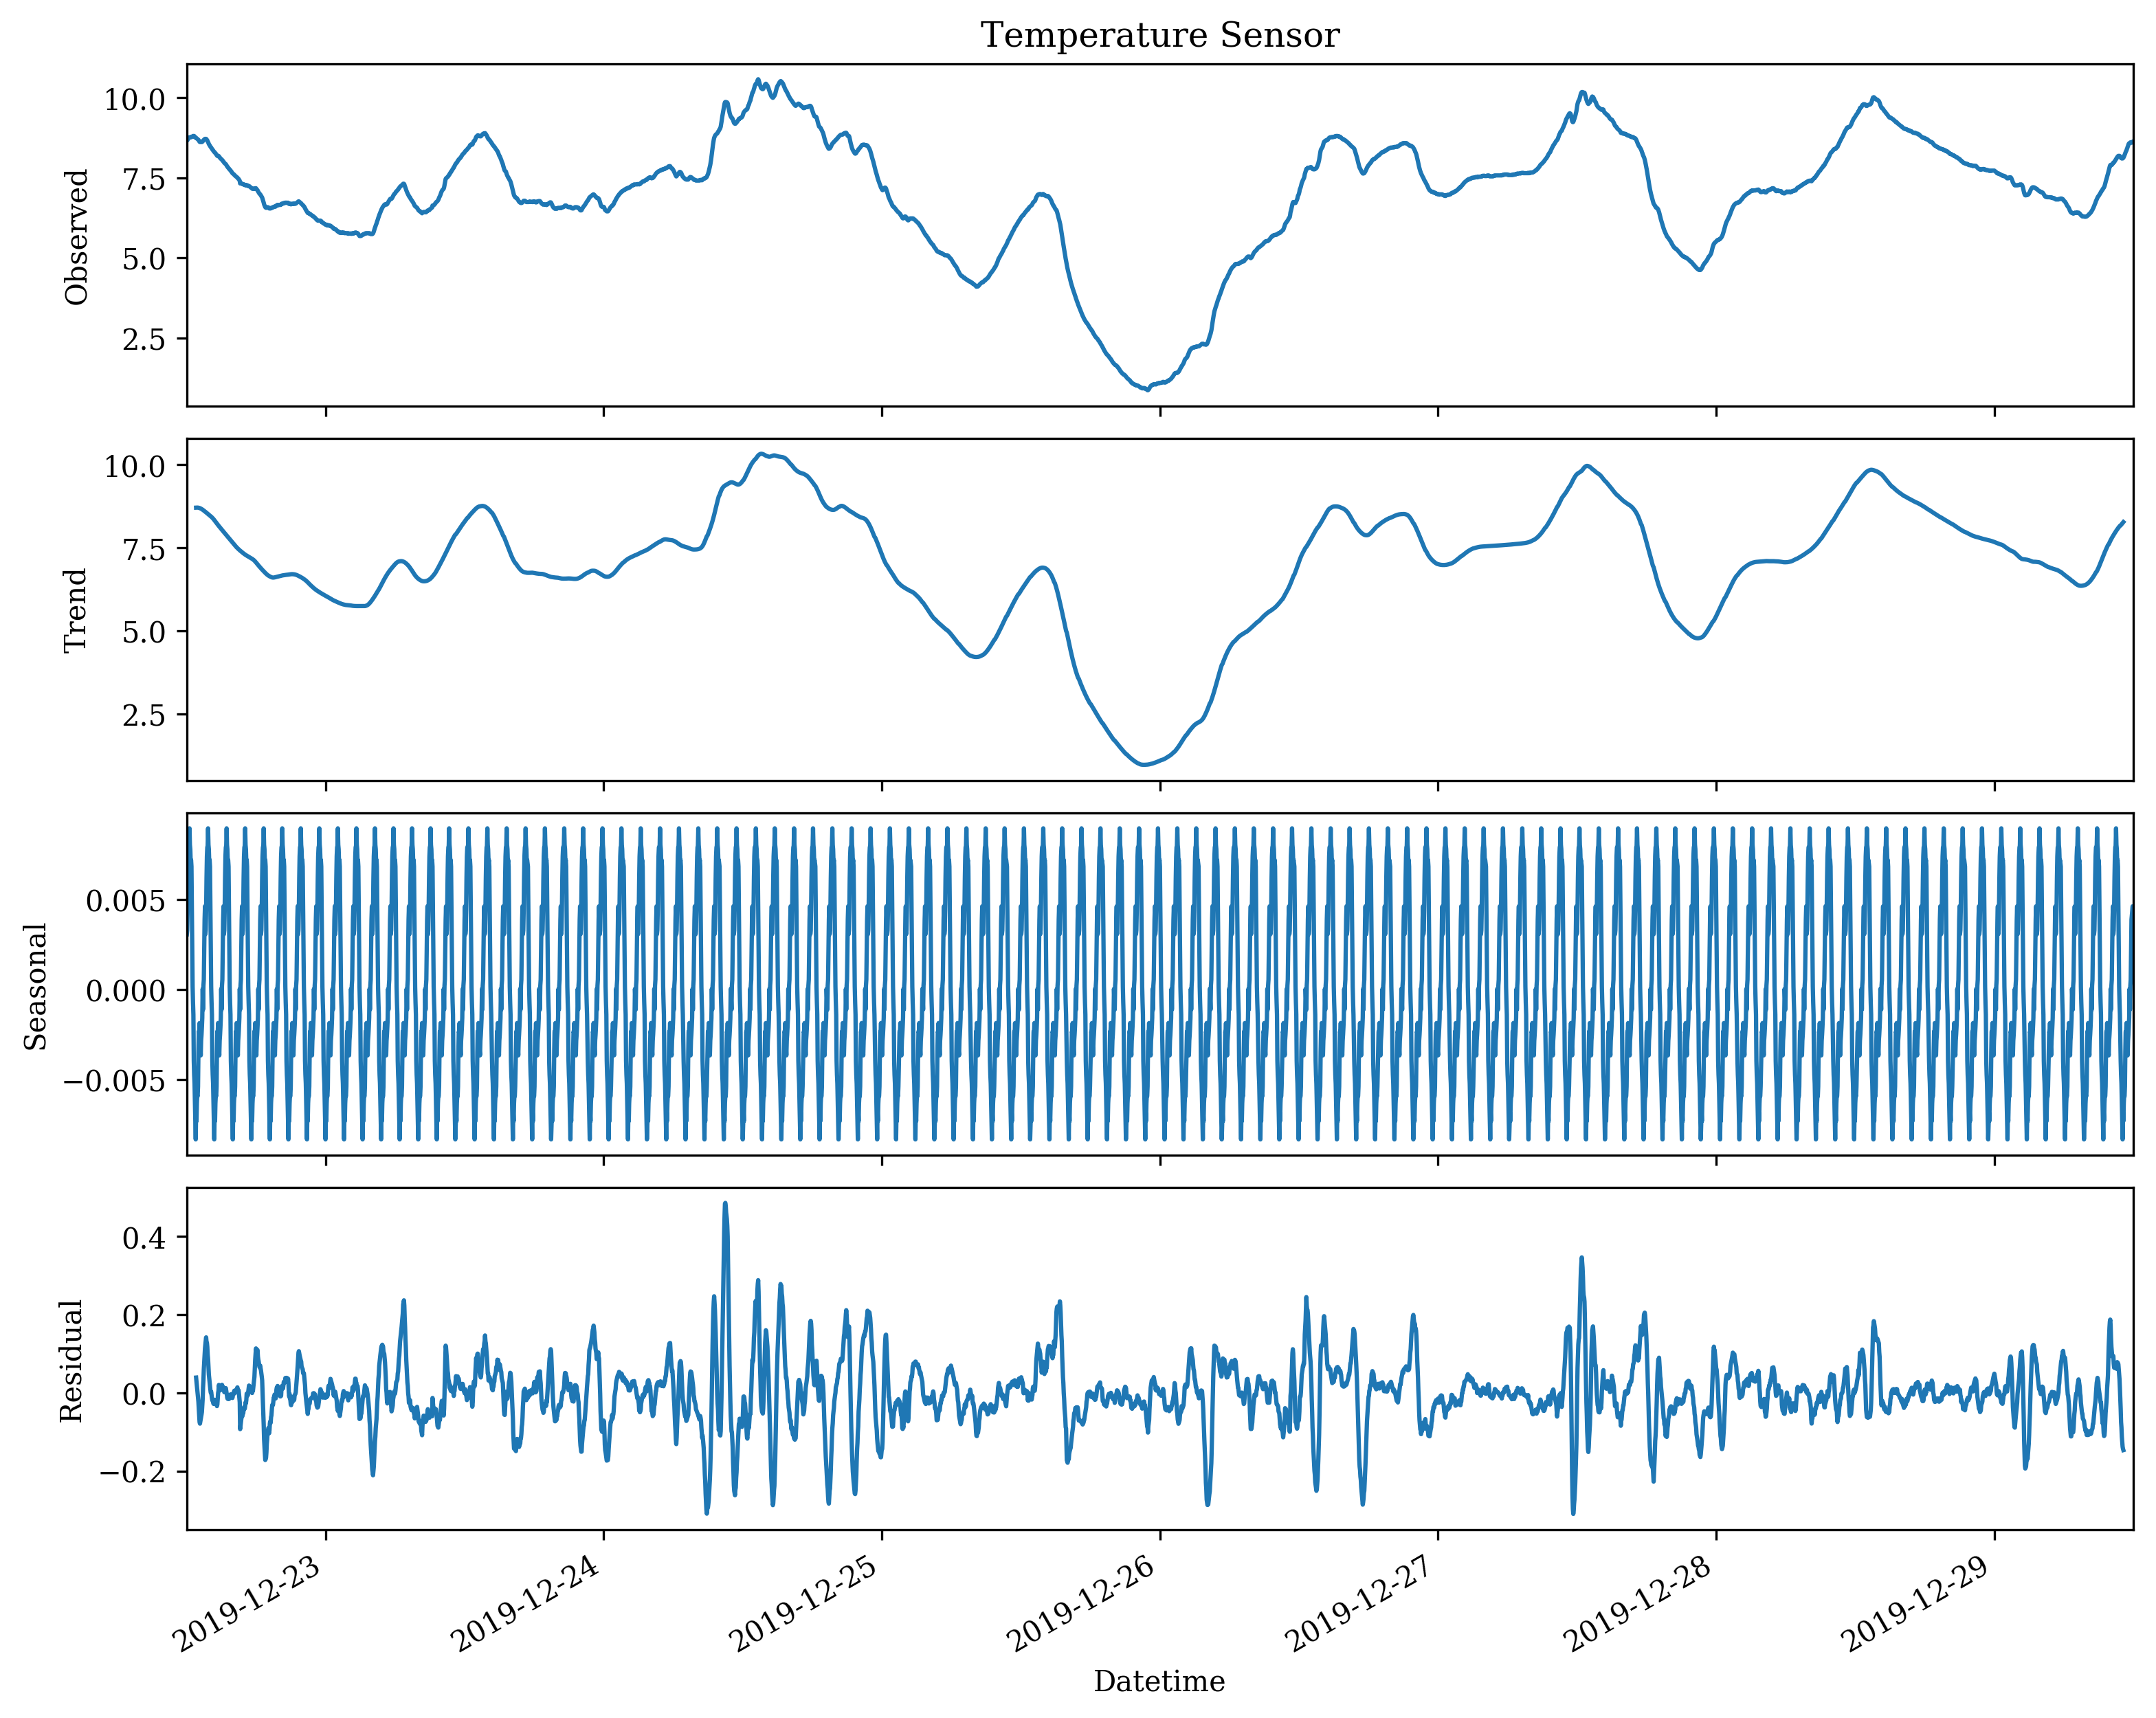

In [5]:
trend_series = []
for i, name in enumerate(weather.columns.values):
    decomposed = sm.tsa.seasonal_decompose(weather[name], freq=48)
    trend_series.append(decomposed.trend)
    figure = decomposed.plot()
    figure.axes[0].set_title(name)
    for j in range(len(figure.axes)):
        figure.axes[j].set_facecolor('xkcd:white')
    figure.set_size_inches(10,8)

trends = pd.concat(trend_series, axis=1)
plt.show()

<h1>Correlation</h1>
The API data is directly plotted against the sensor data, to visually check for correlation. It can be seen that all three data sets do show some correlation. As expected based on previous plots, pressure shows a high degree of correlation, temperature slightly lower, and humidity is the lowest.

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


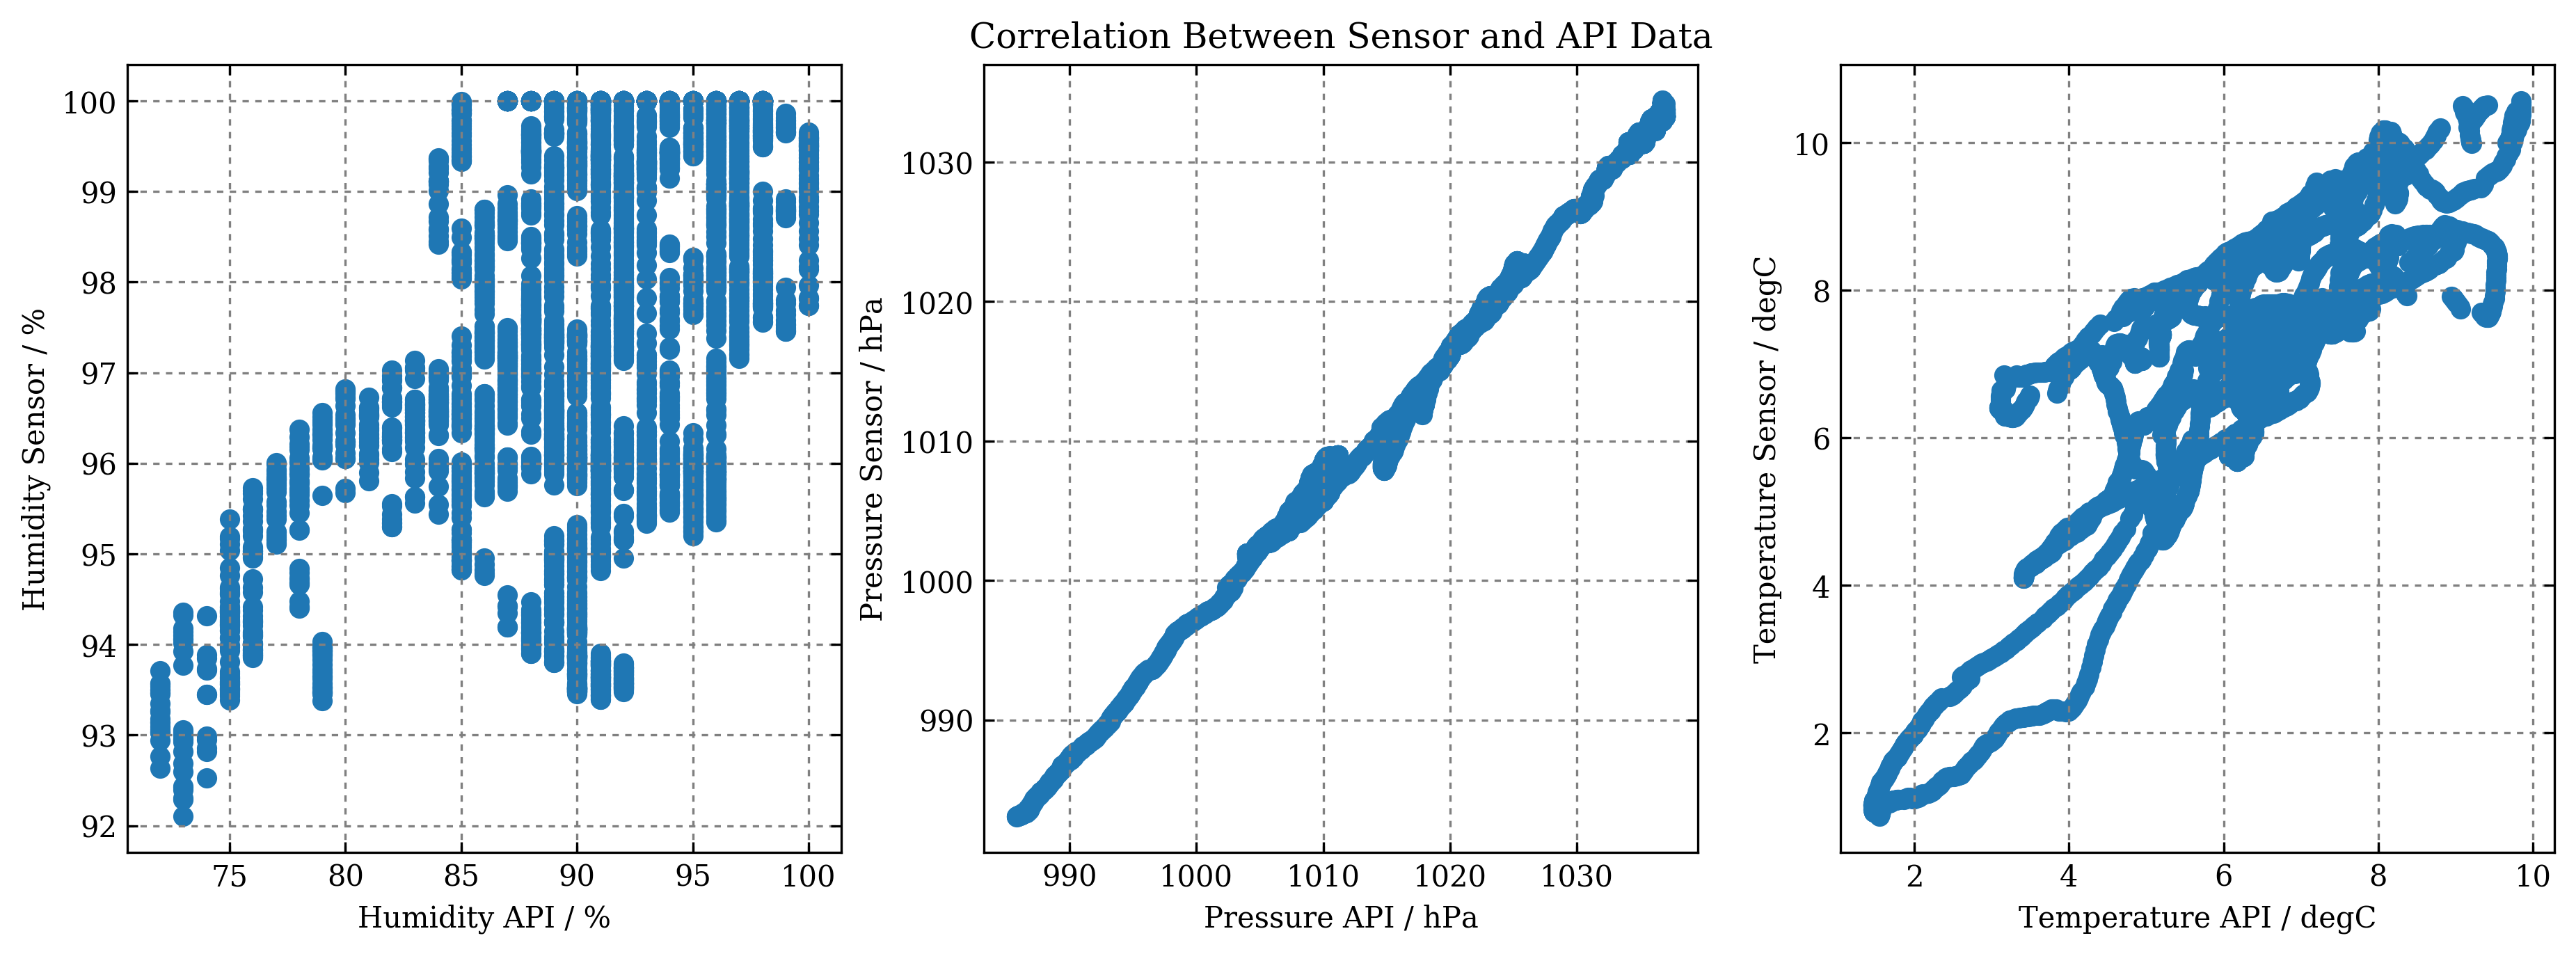

In [6]:
fig, ax = newfigure(1, 3, figsize=(15,5))

ax[0].scatter(weather['Humidity API'],weather['Humidity Sensor'])
ax[0].set_xlabel("Humidity API / %")
ax[0].set_ylabel("Humidity Sensor / %")

ax[1].scatter(weather['Pressure API'],weather['Pressure Sensor'])
ax[1].set_xlabel("Pressure API / hPa")
ax[1].set_ylabel("Pressure Sensor / hPa")

ax[2].scatter(weather['Temperature API'],weather['Temperature Sensor'])
ax[2].set_xlabel("Temperature API / degC")
ax[2].set_ylabel("Temperature Sensor / degC")

ax[1].set_title("Correlation Between Sensor and API Data")
plt.show()
fig.savefig("Figures/fig2.png")

In [7]:
names = ['Humidity API', 'Humidity Sensor', 'Pressure API', 'Pressure Sensor', 'Temperature API']
fig, axs = newfigure()

result_humi = metrics.r2_score(weather['Humidity Sensor'], weather['Humidity API'])
result_pres = metrics.r2_score(weather['Pressure Sensor'], weather['Pressure API'])
result_temp = metrics.r2_score(weather['Temperature Sensor'], weather['Temperature API'])  

print('Coefficients of Determination: \n\nHumidity: {:.3f} \nPressure: {:.3f} \nTemperature: {:.3f}'.format(result_humi,result_pres,result_temp))

Coefficients of Determination: 

Humidity: -15.834 
Pressure: 0.937 
Temperature: 0.485


C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<h1>Curve Fitting</h1>
The polyfit function is used to try and find a function that relates the API data to the sensor data for each metric. For each function, correlation is checked at different degrees to determine the most appropraite polynomial degree for each. 
In the end 4 degrees are used for humidity, 1 for pressure, and 8 for temperature, as correlation does not increase that signficantly at higher degrees for each.

In [8]:
result_humi = [0]*10
result_pres = [0]*10
result_temp = [0]*10

for deg in range(1,11):
    coefsh = np.polyfit(weather['Humidity API'], weather['Humidity Sensor'], deg)
    ffith = np.polyval(coefsh, weather['Humidity API'])
    result_humi[deg-1] = metrics.r2_score(weather['Humidity Sensor'], ffith)
    
    coefsp = np.polyfit(weather['Pressure API'], weather['Pressure Sensor'], deg)
    ffitp = np.polyval(coefsp, weather['Pressure API'])
    result_pres[deg-1] = metrics.r2_score(weather['Pressure Sensor'], ffitp)
    
    coefst = np.polyfit(weather['Temperature API'], weather['Temperature Sensor'], deg)
    ffitt = np.polyval(coefst, weather['Temperature API'])
    result_temp[deg-1] = metrics.r2_score(weather['Temperature Sensor'], ffitt)

print('Coefficients of determination at increasing polynomial degrees:\n')
print('Humidity:', np.around(result_humi,3))
print('Pressure:', np.around(result_pres,3))
print('Temperature:', np.around(result_temp,3))

Coefficients of determination at increasing polynomial degrees:

Humidity: [ 0.262  0.265  0.267  0.268  0.27   0.27   0.271  0.272  0.273  0.273]
Pressure: [ 0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.998  0.998]
Temperature: [ 0.696  0.722  0.728  0.736  0.737  0.748  0.749  0.75   0.75   0.75 ]


C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: Ran

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


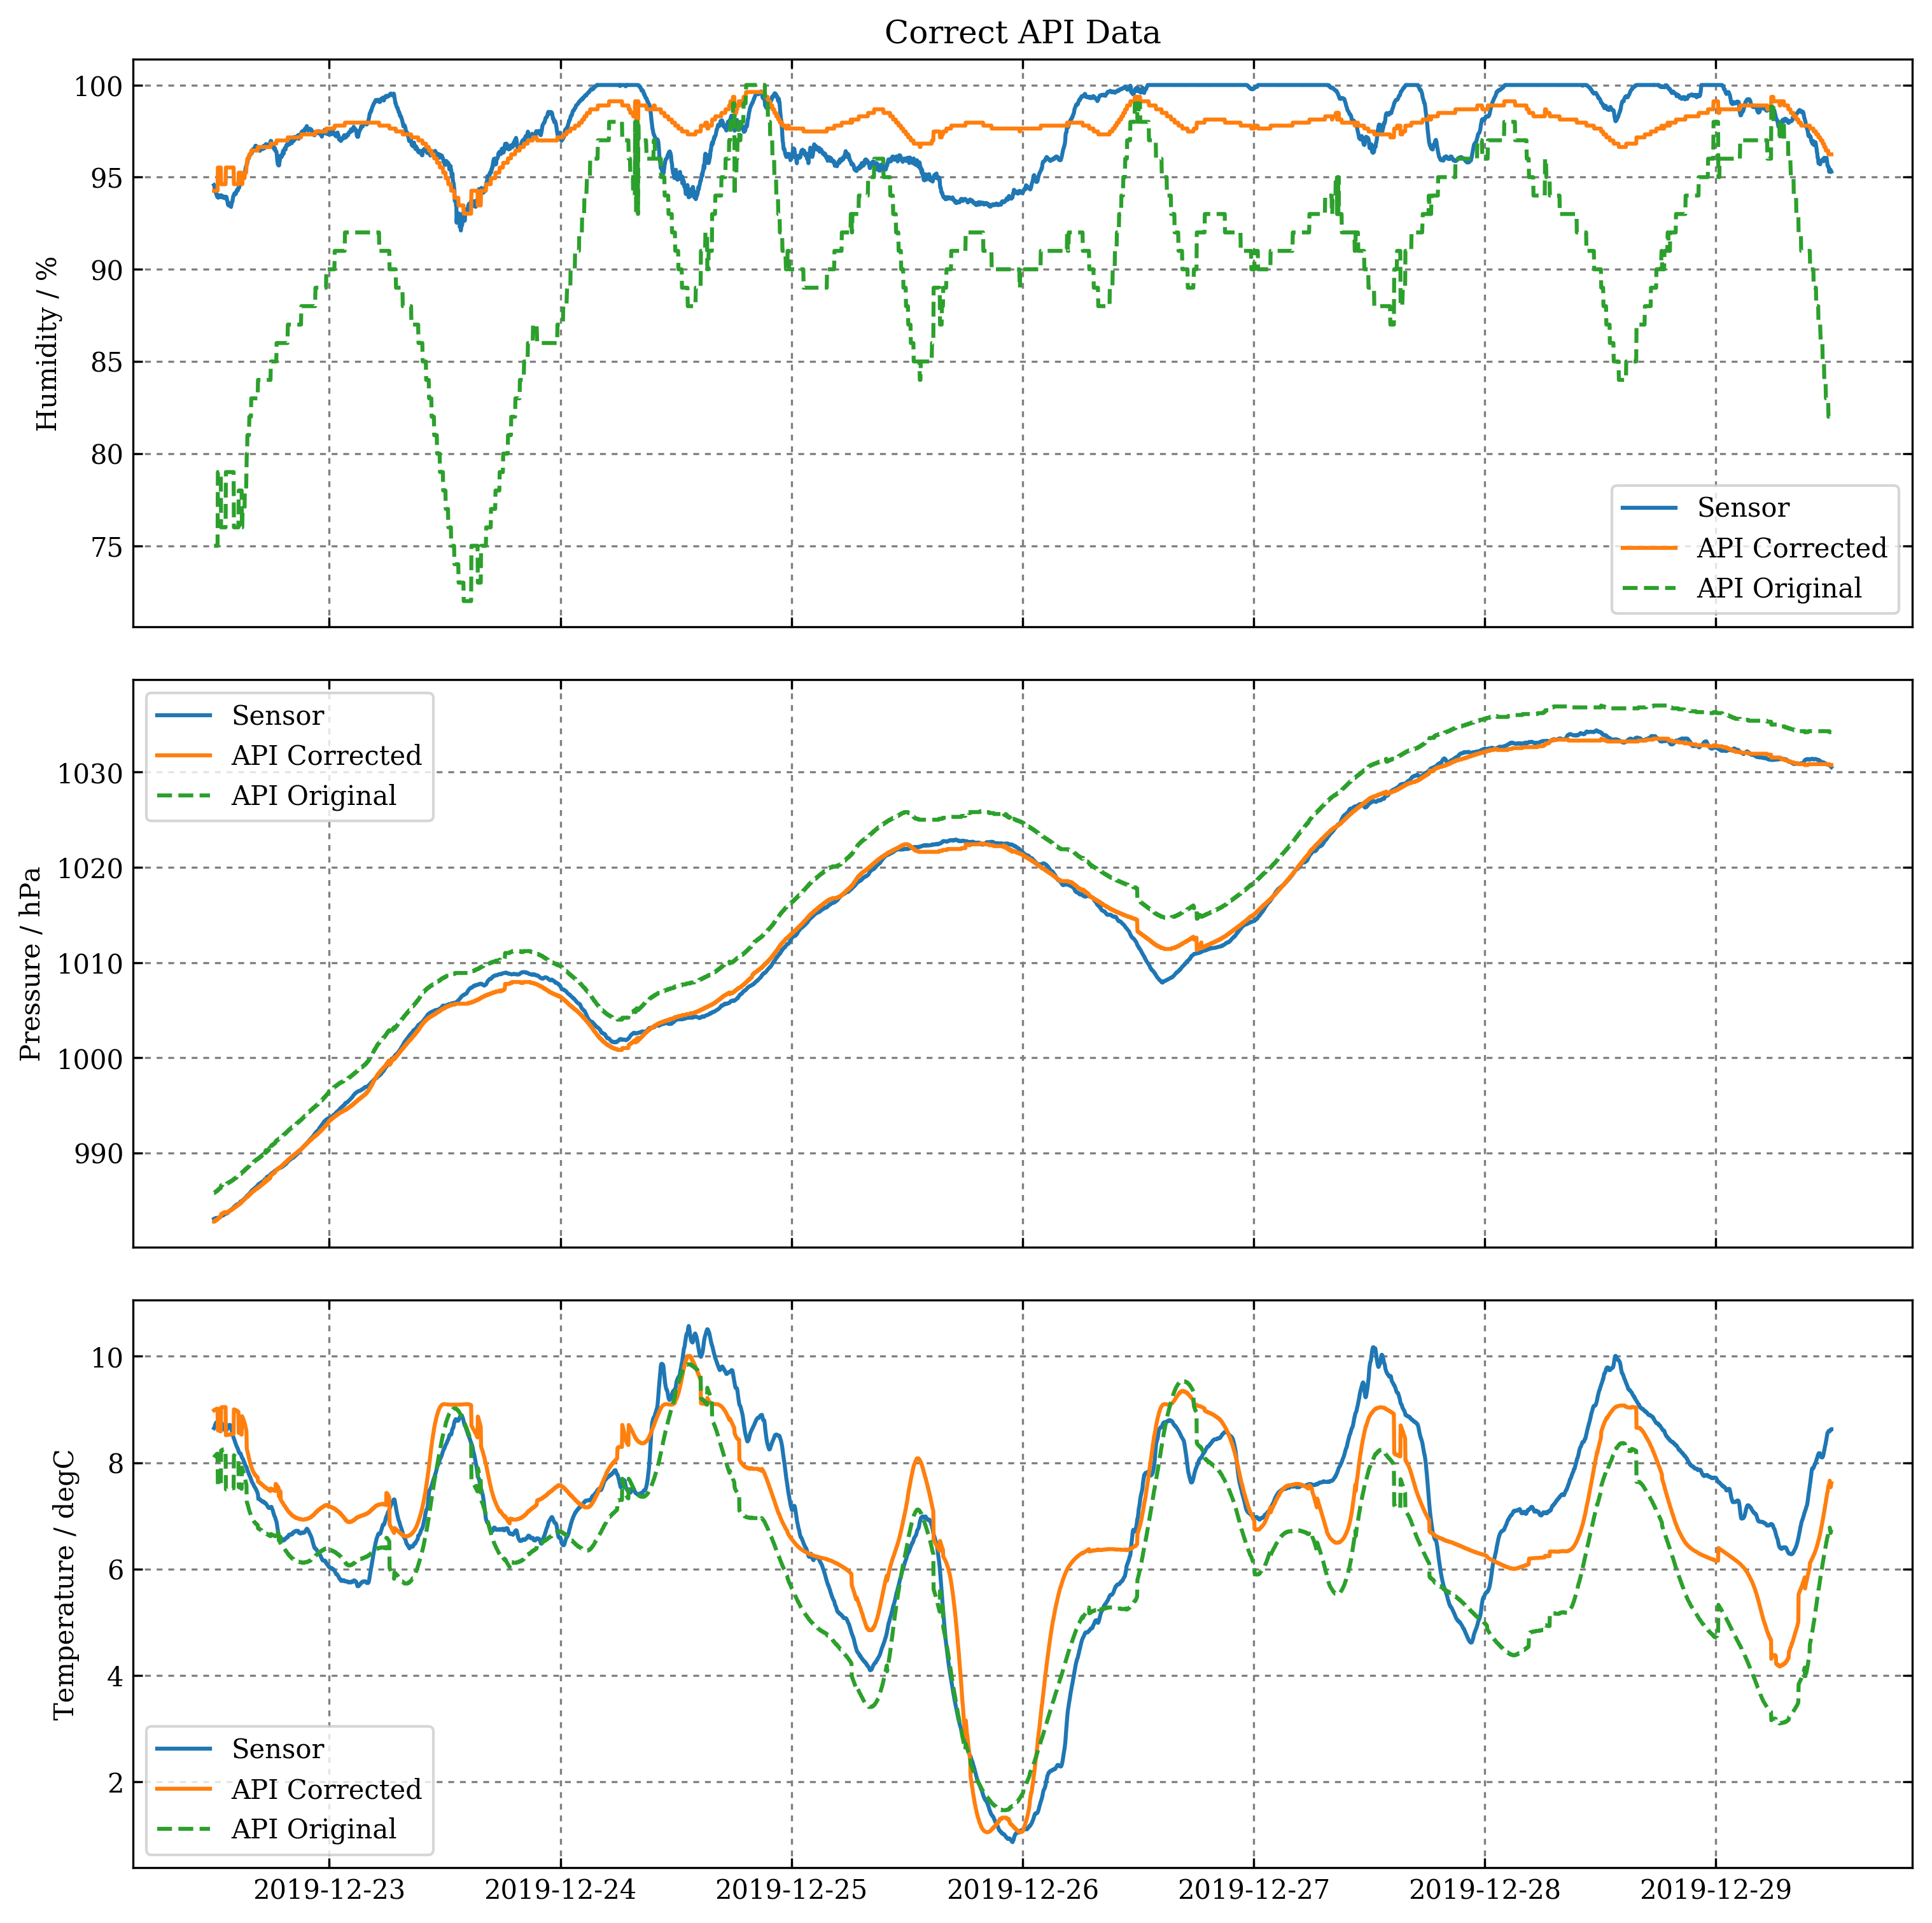

Coefficients of Determination: 

Humidity: 0.267 
Pressure: 0.997 
Temperature: 0.748


In [17]:
coefsh = np.polyfit(weather['Humidity API'], weather['Humidity Sensor'], 3)
ffith = np.polyval(coefsh, weather['Humidity API'])

coefsp = np.polyfit(weather['Pressure API'], weather['Pressure Sensor'], 1)
ffitp = np.polyval(coefsp, weather['Pressure API'])

coefst = np.polyfit(weather['Temperature API'], weather['Temperature Sensor'], 6)
ffitt = np.polyval(coefst, weather['Temperature API'])

fig, ax = newfigure(3, figsize=(10,10), sharex=True)
fig.tight_layout()

ax[0].plot(weather['Humidity Sensor'],label='Sensor')
ax[0].plot(weather.index,ffith,label='API Corrected')
ax[0].plot(weather['Humidity API'],'--',label='API Original')
ax[0].set_ylabel("Humidity / %")
ax[0].legend()

ax[1].plot(weather['Pressure Sensor'],label='Sensor')
ax[1].plot(weather.index,ffitp,label='API Corrected')
ax[1].plot(weather['Pressure API'],'--',label='API Original')
ax[1].set_ylabel("Pressure / hPa")
ax[1].legend()

ax[2].plot(weather['Temperature Sensor'],label='Sensor')
ax[2].plot(weather.index,ffitt,label='API Corrected')
ax[2].plot(weather['Temperature API'],'--',label='API Original')
ax[2].set_ylabel("Temperature / degC")
ax[2].legend()

ax[0].set_title("Correct API Data")
plt.show()
fig.subplots_adjust(left=0.1)
fig.savefig("Figures/fig3.png")

result_humi = metrics.r2_score(weather['Humidity Sensor'], ffith)
result_pres = metrics.r2_score(weather['Pressure Sensor'], ffitp)
result_temp = metrics.r2_score(weather['Temperature Sensor'], ffitt)

print('Coefficients of Determination: \n\nHumidity: {:.3f} \nPressure: {:.3f} \nTemperature: {:.3f}'.format(result_humi,result_pres,result_temp))

<h1>Data Smoothing</h1>
<p>It's possible that noisy data was preventing the functions from fitting properly. This could be helped by smoothing out the data, by using a 30-point moving average, for example. Where the data was previously sampled every 2 minutes, it's now taking the average of the last 60 minutes (or last hour). The effect of this is less noisy data, but still accounting for highs and lows across the hour.</p>
<p>The same function finding process is then applied to the smoothed data.</p>

In [10]:
#Let's try smoothing the data sets and see if that improves things

time = []
humi_api_smooth = []
humi_sens_smooth = []
pres_api_smooth = []
pres_sens_smooth = []
temp_api_smooth = []
temp_sens_smooth = []

point = 30
for i in range(point,len(weather)):
    tot_ha=tot_hs=tot_pa=tot_ps=tot_ta=tot_ts = 0
    for j in range(point):
        tot_ha += weather['Humidity API'][i-j]
        tot_hs += weather['Humidity Sensor'][i-j]
        tot_pa += weather['Pressure API'][i-j]
        tot_ps += weather['Pressure Sensor'][i-j]
        tot_ta += weather['Temperature API'][i-j]
        tot_ts += weather['Temperature Sensor'][i-j]
    time.append(weather.index[i])
    humi_api_smooth.append(tot_ha/point)
    humi_sens_smooth.append(tot_hs/point)
    pres_api_smooth.append(tot_pa/point)
    pres_sens_smooth.append(tot_ps/point)
    temp_api_smooth.append(tot_ta/point)
    temp_sens_smooth.append(tot_ts/point)

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


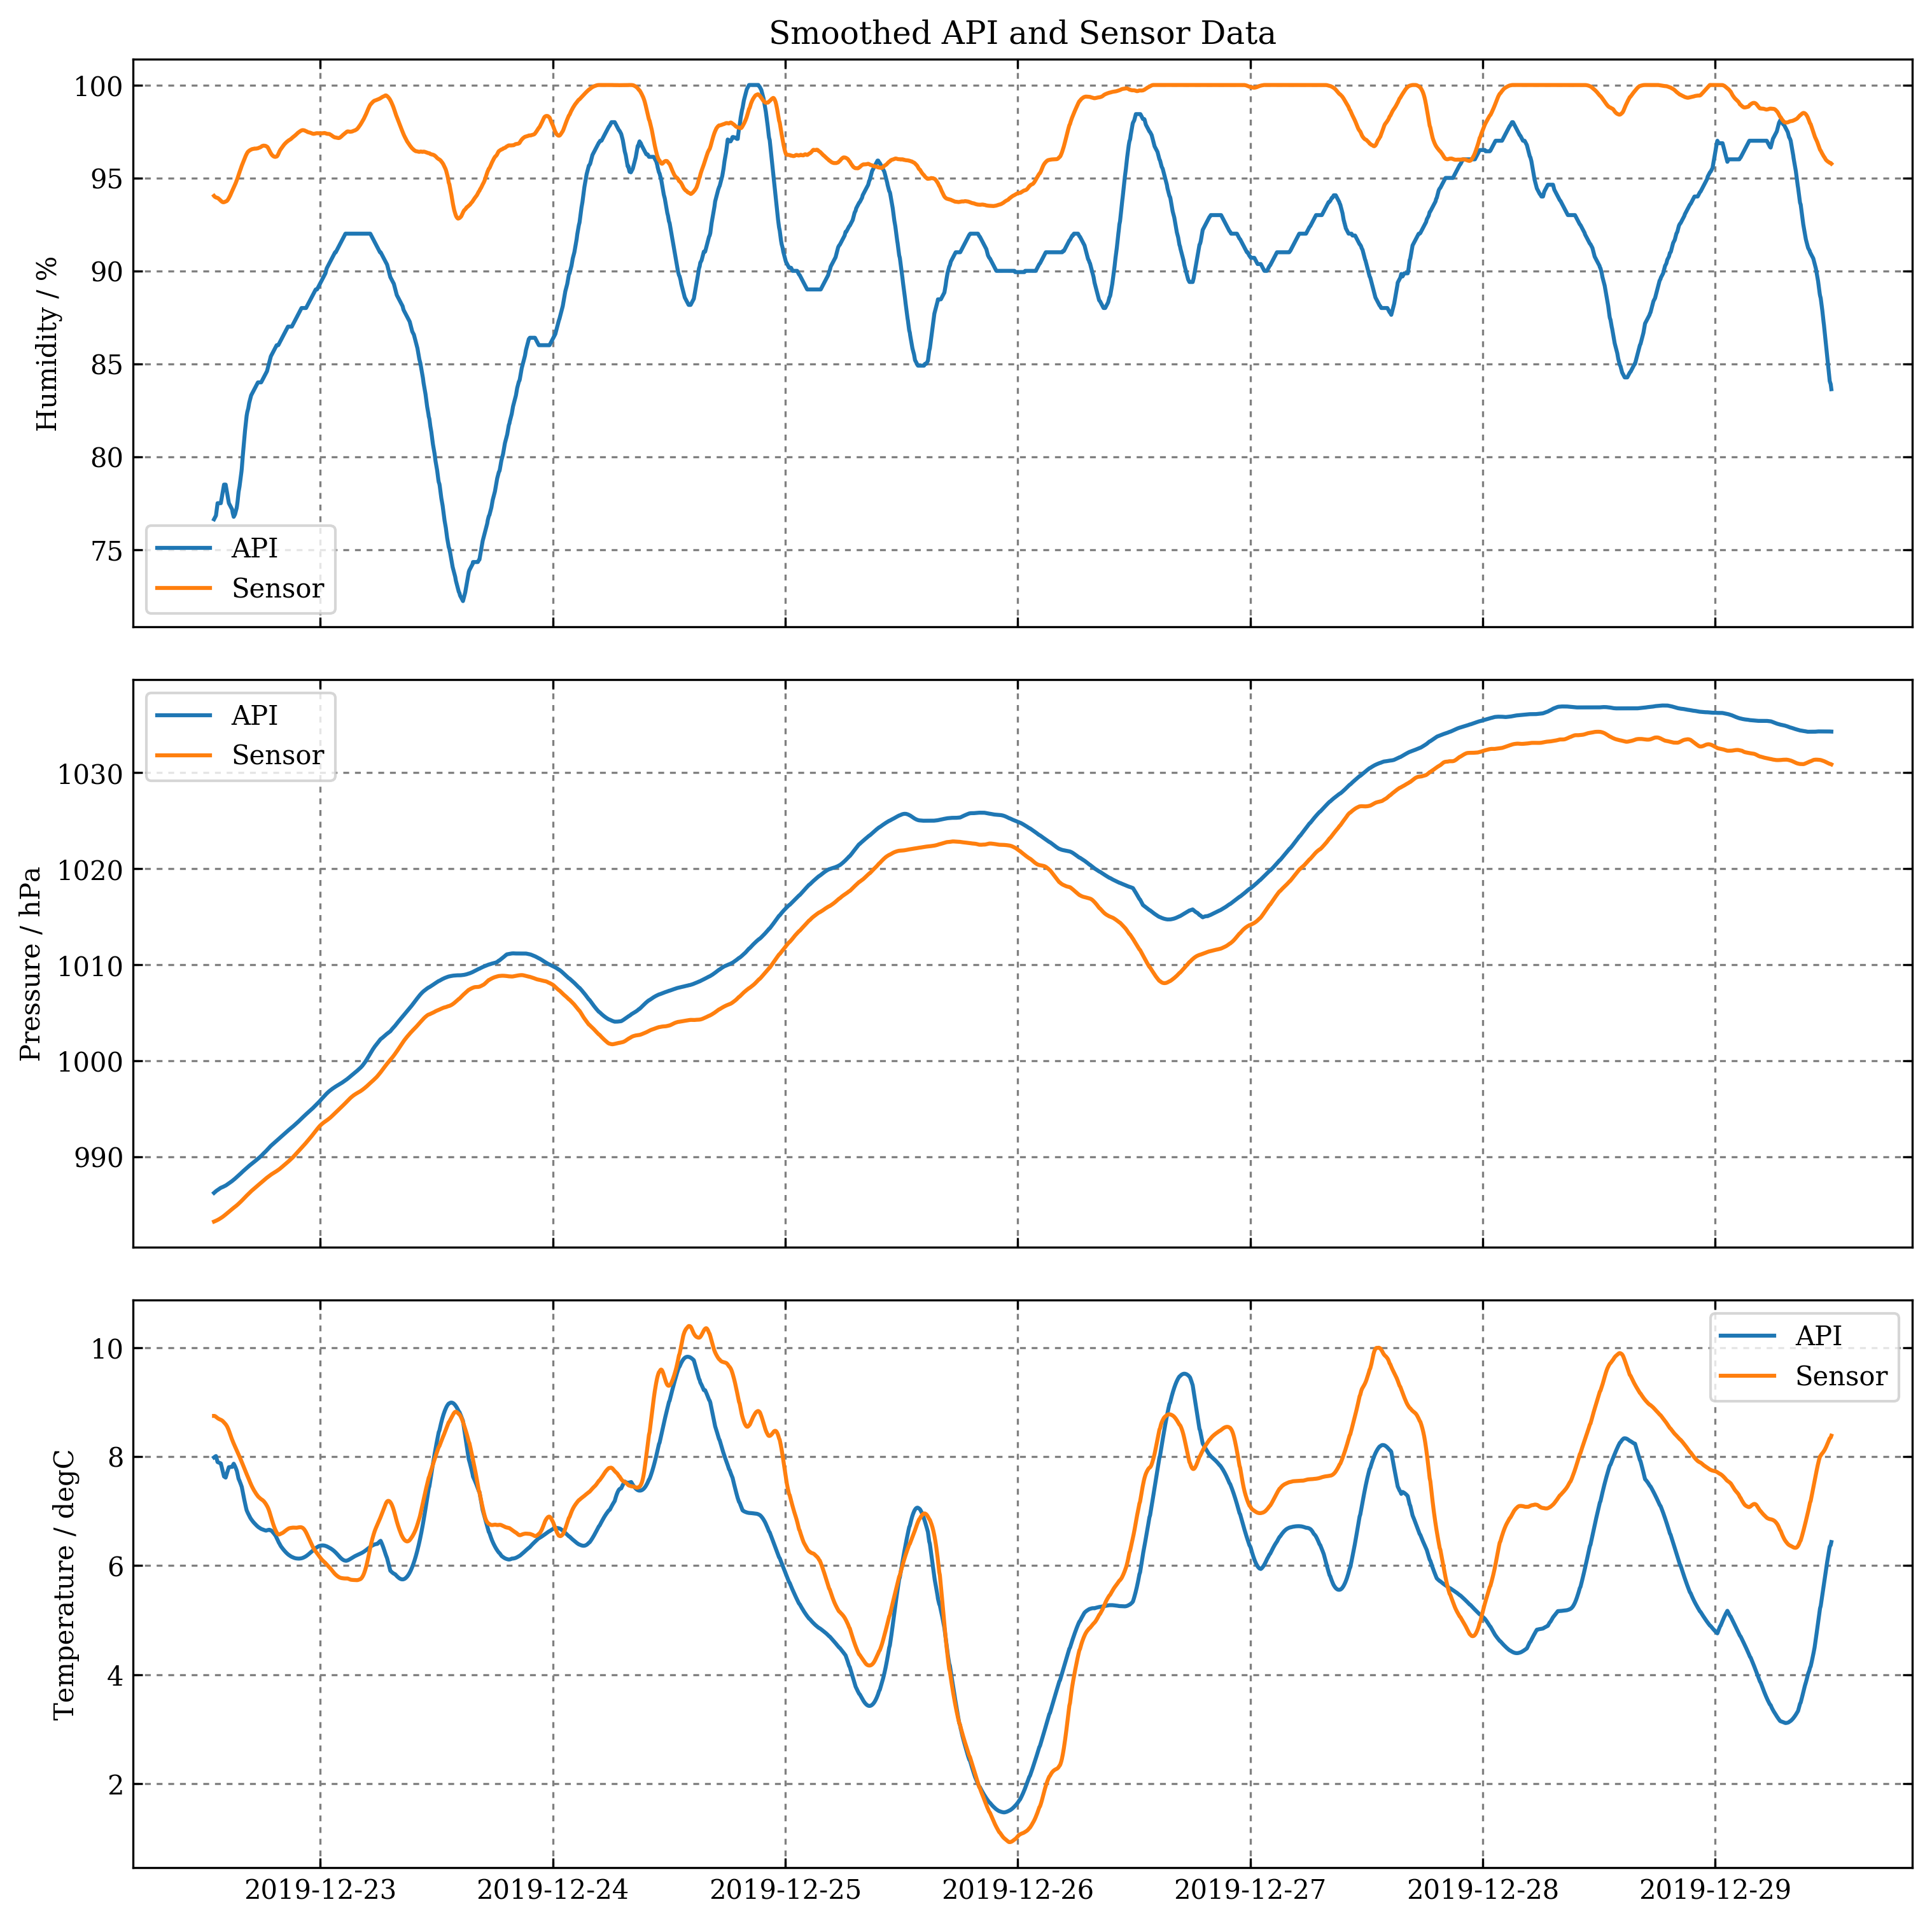

In [11]:
fig, ax = newfigure(3, figsize=(10,10), sharex=True)
fig.tight_layout()

ax[0].plot(time,humi_api_smooth,label='API')
ax[0].plot(time,humi_sens_smooth,label='Sensor')
ax[0].set_ylabel("Humidity / %")
ax[0].legend()

ax[1].plot(time,pres_api_smooth,label='API')
ax[1].plot(time,pres_sens_smooth,label='Sensor')
ax[1].set_ylabel("Pressure / hPa")
ax[1].legend()

ax[2].plot(time,temp_api_smooth,label='API')
ax[2].plot(time,temp_sens_smooth,label='Sensor')
ax[2].set_ylabel("Temperature / degC")
ax[2].legend()

ax[0].set_title("Smoothed API and Sensor Data")
plt.show()
fig.subplots_adjust(left=0.1)
fig.savefig("Figures/fig4.png")

In [12]:
result_humi = [0]*10
result_pres = [0]*10
result_temp = [0]*10

for deg in range(1,11):
    coefsh = np.polyfit(humi_api_smooth, humi_sens_smooth, deg)
    ffith = np.polyval(coefsh, humi_api_smooth)
    result_humi[deg-1] = metrics.r2_score(humi_sens_smooth, ffith)
    
    coefsp = np.polyfit(pres_api_smooth, pres_sens_smooth, deg)
    ffitp = np.polyval(coefsp, pres_api_smooth)
    result_pres[deg-1] = metrics.r2_score(pres_sens_smooth, ffitp)
    
    coefst = np.polyfit(temp_api_smooth, temp_sens_smooth, deg)
    ffitt = np.polyval(coefst, temp_api_smooth)
    result_temp[deg-1] = metrics.r2_score(temp_sens_smooth, ffitt)
    
print(np.around(result_humi,3))
print(np.around(result_pres,3))
print(np.around(result_temp,3))

[ 0.259  0.261  0.264  0.265  0.267  0.268  0.269  0.272  0.273  0.273]
[ 0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.998]
[ 0.699  0.724  0.731  0.738  0.74   0.75   0.752  0.752  0.752  0.753]


C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Hayden\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: Ran

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


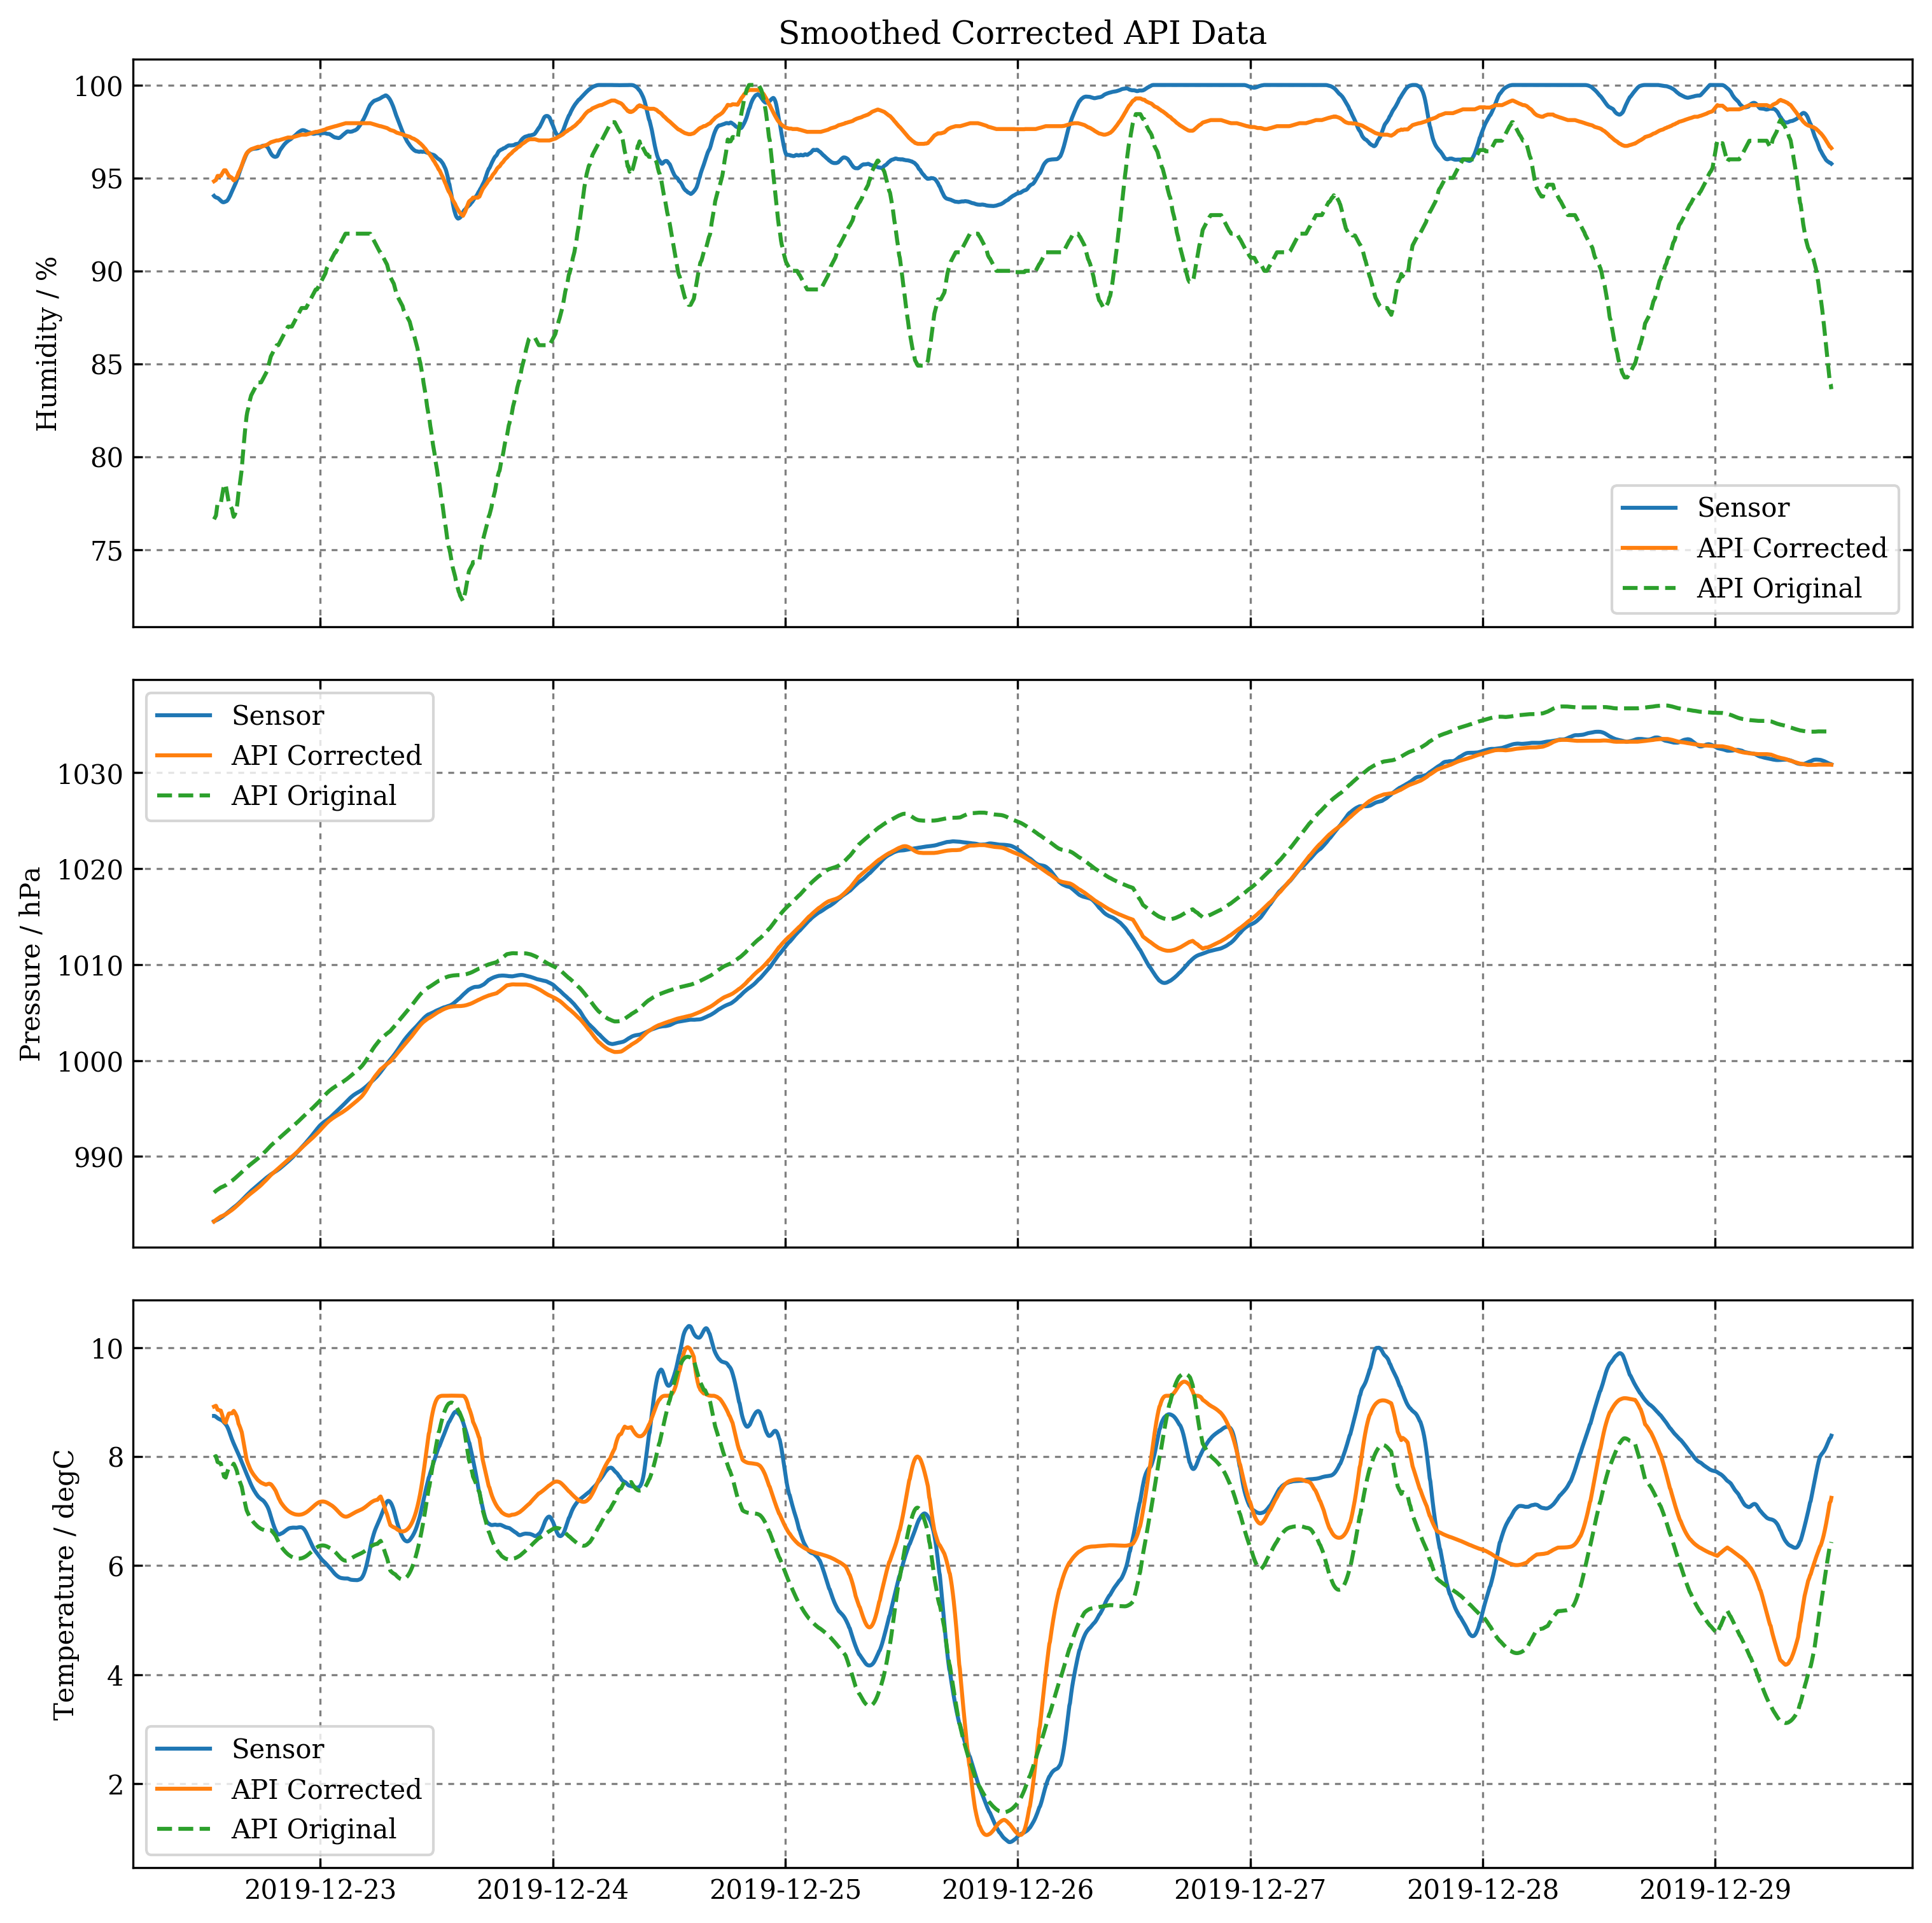

Coefficients of Determination: 

Humidity: 0.264 
Pressure: 0.997 
Temperature: 0.750


In [13]:
coefsh = np.polyfit(humi_api_smooth, humi_sens_smooth, 3)
ffith = np.polyval(coefsh, humi_api_smooth)

coefsp = np.polyfit(pres_api_smooth, pres_sens_smooth, 1)
ffitp = np.polyval(coefsp, pres_api_smooth)

coefst = np.polyfit(temp_api_smooth, temp_sens_smooth, 6)
ffitt = np.polyval(coefst, temp_api_smooth)

fig, ax = newfigure(3, figsize=(10,10),sharex=True)
fig.tight_layout()

ax[0].plot(time,humi_sens_smooth,label='Sensor')
ax[0].plot(time,ffith,label='API Corrected')
ax[0].plot(time,humi_api_smooth,'--',label='API Original')
ax[0].set_ylabel("Humidity / %")
ax[0].legend()

ax[1].plot(time,pres_sens_smooth,label='Sensor')
ax[1].plot(time,ffitp,label='API Corrected')
ax[1].plot(time,pres_api_smooth,'--',label='API Original')
ax[1].set_ylabel("Pressure / hPa")
ax[1].legend()

ax[2].plot(time,temp_sens_smooth,label='Sensor')
ax[2].plot(time,ffitt,label='API Corrected')
ax[2].plot(time,temp_api_smooth,'--',label='API Original')
ax[2].set_ylabel("Temperature / degC")
ax[2].legend()

ax[0].set_title("Smoothed Corrected API Data")
plt.show()
fig.subplots_adjust(left=0.1)
fig.savefig("Figures/fig5.png")

result_humi = metrics.r2_score(humi_sens_smooth,ffith)
result_pres = metrics.r2_score(pres_sens_smooth,ffitp)
result_temp = metrics.r2_score(temp_sens_smooth,ffitt) 

print('Coefficients of Determination: \n\nHumidity: {:.3f} \nPressure: {:.3f} \nTemperature: {:.3f}'.format(result_humi,result_pres,result_temp))

In [14]:
print(coefsh)
print(coefsp)
print(coefst)

[  4.30812832e-04  -1.14872150e-01   1.03607614e+01  -2.18436791e+02]
[ 0.99096467  5.88741918]
[  2.41981635e-03  -8.46612916e-02   1.17002671e+00  -8.07529202e+00
   2.87940110e+01  -4.77498866e+01   3.00694583e+01]


<h1>Testing the Functions</h1>
More data is pulled from the sensor and API, and the data is adjusted to the same format as previously so it can be evaluated in the same way.

In [19]:
import gspread
import requests
from oauth2client.service_account import ServiceAccountCredentials

#access google drive spreadsheet
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
response = requests.get("https://api.darksky.net/forecast/d401ed134bec7085ac821974ffa23b7e/51.724,0.465?units=auto&exclude=minutely,hourly,daily,alerts,flags")
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json',scope)                
client = gspread.authorize(creds)
sheet = client.open("Weather Data").sheet1

weather_test1 = sheet.get_all_values()
weather_test = []
for i in range(len(weather_test1)):
    weather_test.append(weather_test1[i][0:7])
headers = weather_test1[0]
headers[5] = 'Temperature API'
headers[6] = 'Temperature Sensor'
weather_test = weather_test[277:len(weather_test)]
weather_test = pd.DataFrame(weather_test, columns=headers)

#remove duplicates
weather = weather[~weather.index.duplicated()]

#Tell code that the first column is a datetime
for name in list(weather_test):
    if name != list(weather_test)[0]:
        weather_test[name] =  pd.to_numeric(weather_test[name])
weather_test['Datetime'] =  pd.to_datetime(weather_test['Datetime'],dayfirst=True)
#Tell code that the first column is the index column
weather_test = weather_test.set_index(list(weather_test)[0])

print(weather_test.head())

                     Humidity API  Humidity Sensor  Pressure API  \
Datetime                                                           
2019-12-23 09:14:01            87           96.442        1006.1   
2019-12-23 09:16:01            86           96.359        1006.1   
2019-12-23 09:18:01            86           96.336        1006.2   
2019-12-23 09:20:01            86           96.397        1006.2   
2019-12-23 09:22:01            86           96.382        1006.3   

                     Pressure Sensor  Temperature API  Temperature Sensor  
Datetime                                                                   
2019-12-23 09:14:01          1003.43             6.07                6.63  
2019-12-23 09:16:01          1003.43             6.09                6.63  
2019-12-23 09:18:01          1003.45             6.11                6.63  
2019-12-23 09:20:01          1003.48             6.13                6.64  
2019-12-23 09:22:01          1003.49             6.15              

<h1>Evaluation of the Functions</h1>
<p>Each function for humidity, pressure, and temperature are tested with the new datasets pulled in live using the Google Sheets API. The data is also smoothed again, as the functions being used were the ones generated after smoothing.</p>
<p>Visually it can be seen that the functions improve the accuracy of the data, especially for humidity and pressure. The correlation has fallen for each compared to the raw data, however this does not necessarily mean the data is less accurate.</p>

C:\Users\Hayden\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


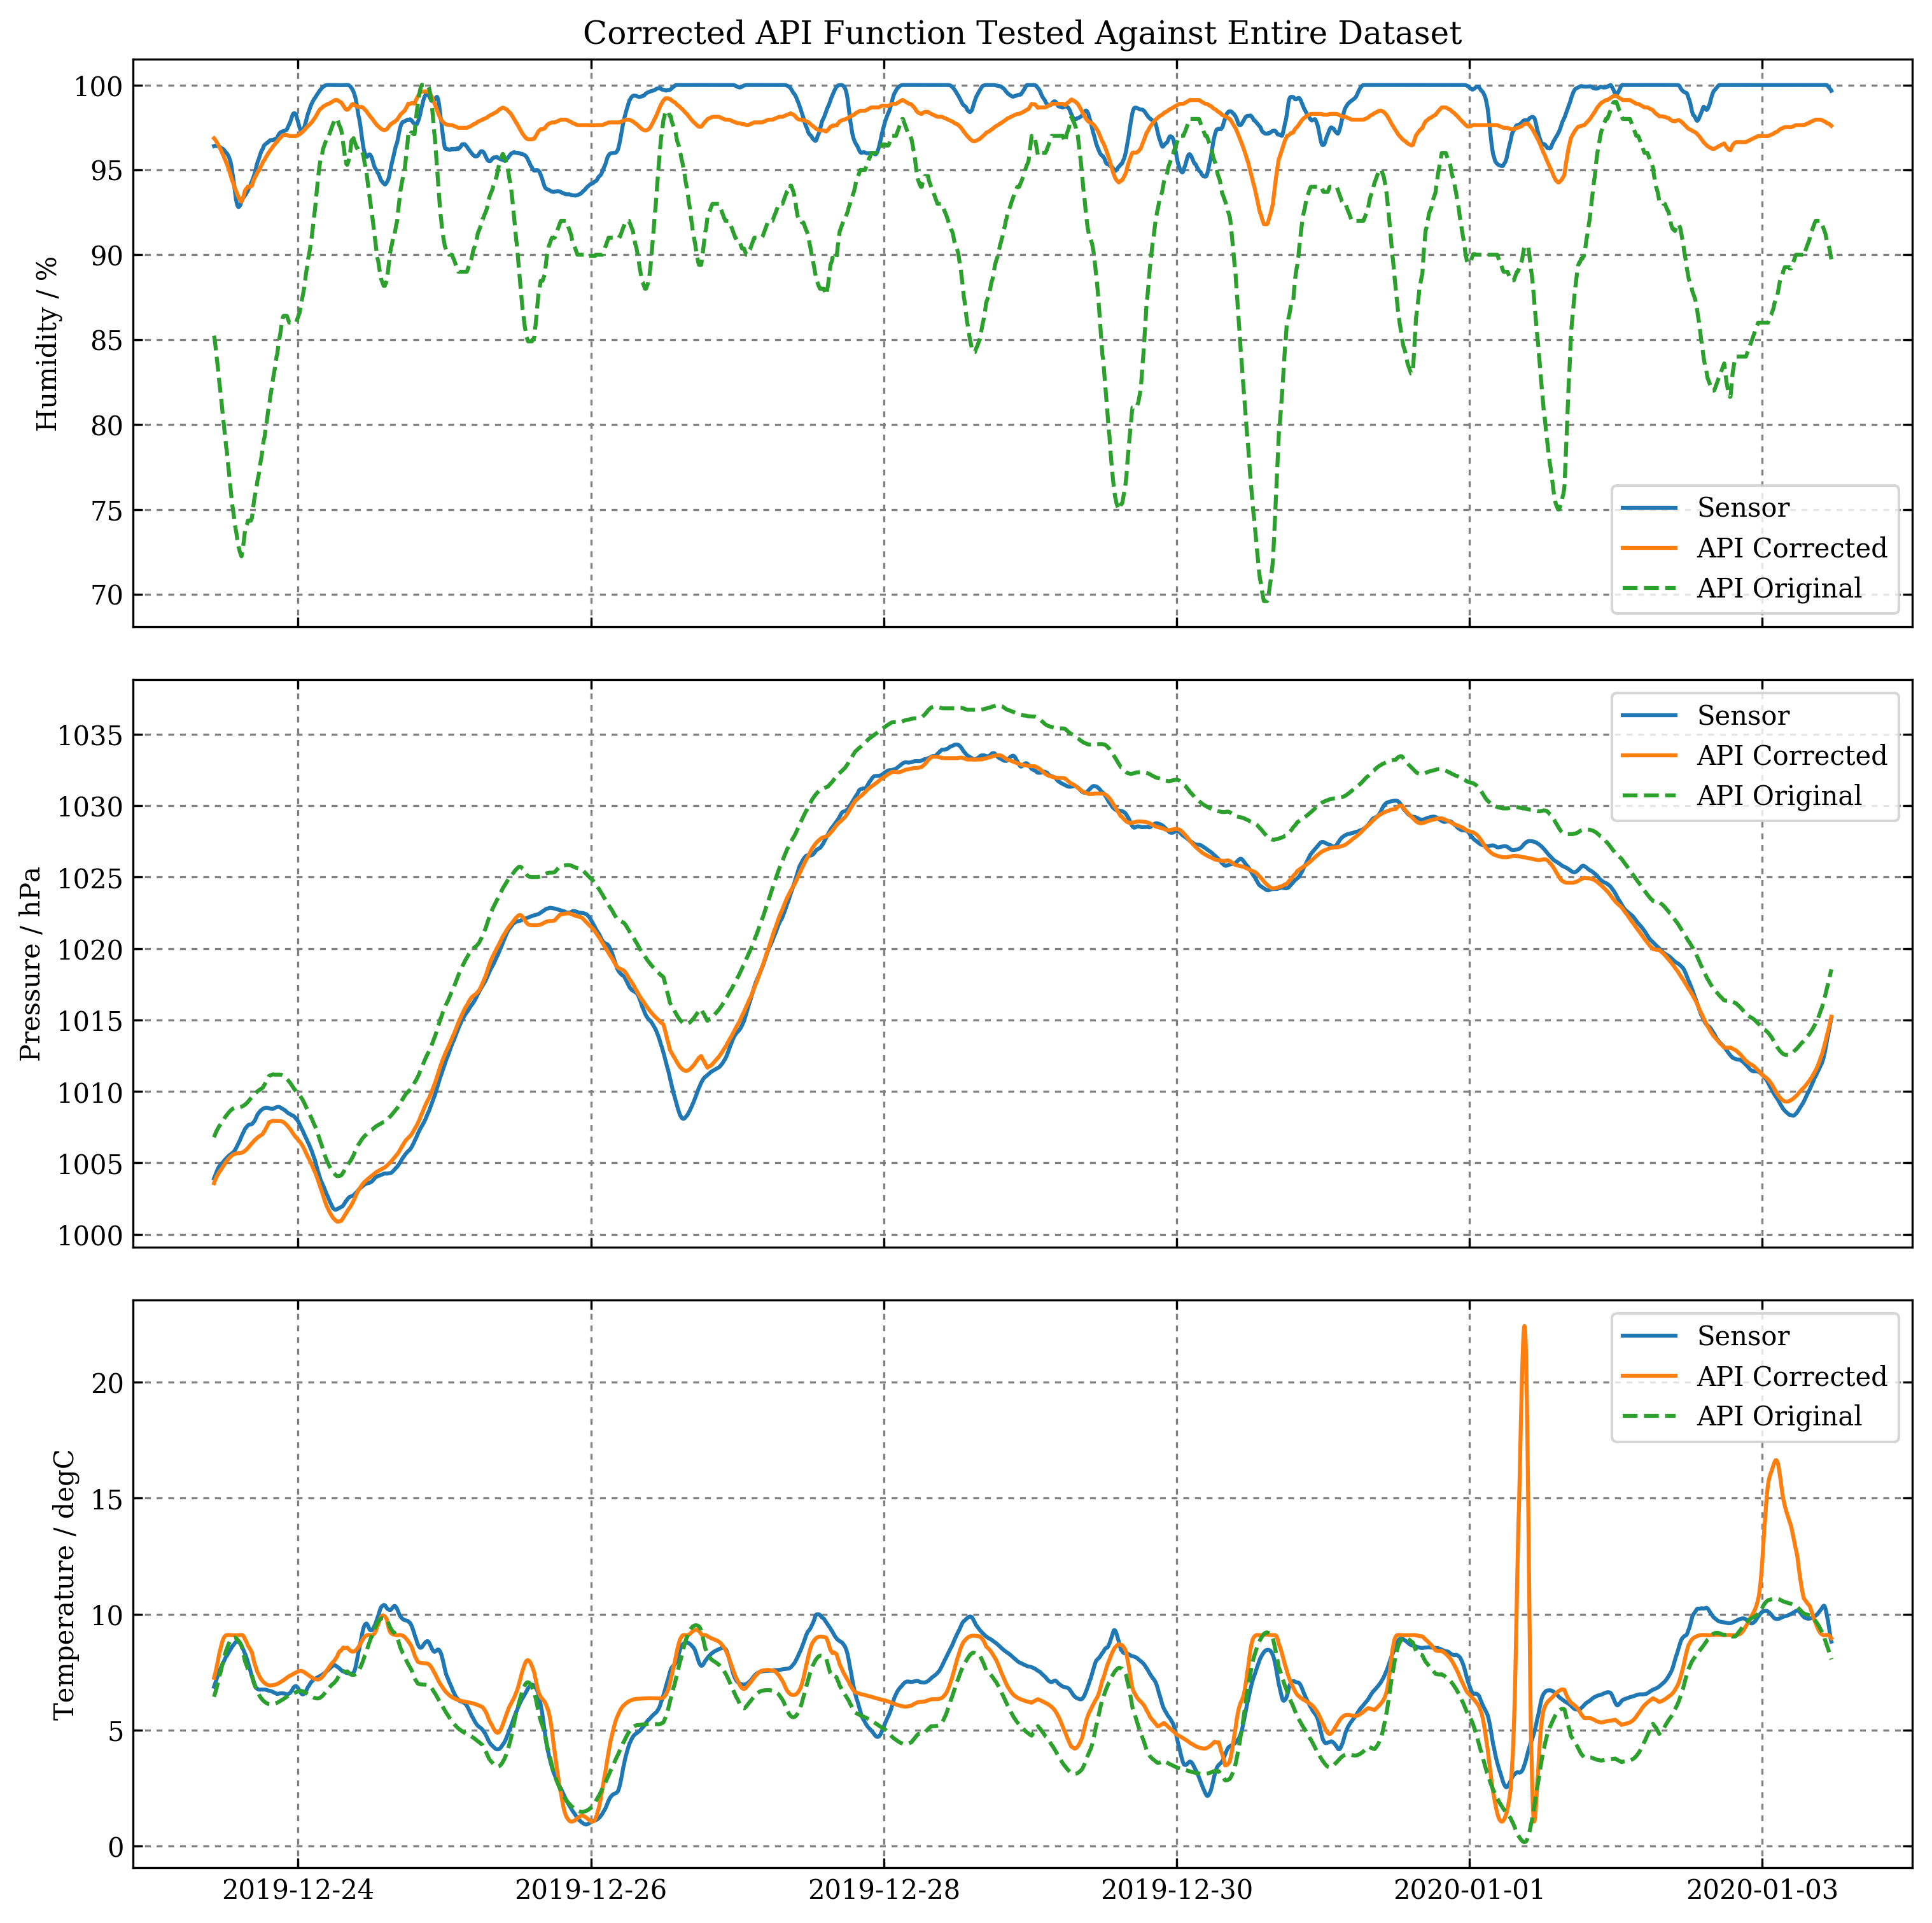

Coefficients of Determination: 

Humidity: -0.120 
Pressure: 0.994 
Temperature: 0.262


In [21]:
#Smooth the data first

time_test = []
humi_api_smooth_test = []
humi_sens_smooth_test = []
pres_api_smooth_test = []
pres_sens_smooth_test = []
temp_api_smooth_test = []
temp_sens_smooth_test = []

point = 30
for i in range(point,len(weather_test)):
    tot_ha=tot_hs=tot_pa=tot_ps=tot_ta=tot_ts = 0
    for j in range(point):
        tot_ha += weather_test['Humidity API'][i-j]
        tot_hs += weather_test['Humidity Sensor'][i-j]
        tot_pa += weather_test['Pressure API'][i-j]
        tot_ps += weather_test['Pressure Sensor'][i-j]
        tot_ta += weather_test['Temperature API'][i-j]
        tot_ts += weather_test['Temperature Sensor'][i-j]
    time_test.append(weather_test.index[i])
    humi_api_smooth_test.append(tot_ha/point)
    humi_sens_smooth_test.append(tot_hs/point)
    pres_api_smooth_test.append(tot_pa/point)
    pres_sens_smooth_test.append(tot_ps/point)
    temp_api_smooth_test.append(tot_ta/point)
    temp_sens_smooth_test.append(tot_ts/point)

#Use the previously calculated functions with the new data set

ffith_test = np.polyval(coefsh, humi_api_smooth_test)
ffitp_test = np.polyval(coefsp, pres_api_smooth_test)
ffitt_test = np.polyval(coefst, temp_api_smooth_test)

#Plot the results

fig, ax = newfigure(3, figsize=(10,10), sharex=True)
fig.tight_layout()

ax[0].plot(time_test, humi_sens_smooth_test,label='Sensor')
ax[0].plot(time_test, ffith_test,label='API Corrected')
ax[0].plot(time_test, humi_api_smooth_test,'--',label='API Original')
ax[0].set_ylabel("Humidity / %")
ax[0].legend()

ax[1].plot(time_test, pres_sens_smooth_test,label='Sensor')
ax[1].plot(time_test, ffitp_test,label='API Corrected')
ax[1].plot(time_test, pres_api_smooth_test,'--',label='API Original')
ax[1].set_ylabel("Pressure / hPa")
ax[1].legend()

ax[2].plot(time_test, temp_sens_smooth_test,label='Sensor')
ax[2].plot(time_test, ffitt_test,label='API Corrected')
ax[2].plot(time_test, temp_api_smooth_test,'--',label='API Original')
ax[2].set_ylabel("Temperature / degC")
ax[2].legend()

ax[0].set_title("Corrected API Function Tested Against Entire Dataset")
plt.show()
fig.subplots_adjust(left=0.1)
fig.savefig("Figures/fig6.png")

result_humi = metrics.r2_score(humi_sens_smooth_test, ffith_test)
result_pres = metrics.r2_score(pres_sens_smooth_test, ffitp_test)
result_temp = metrics.r2_score(temp_sens_smooth_test, ffitt_test)

print('Coefficients of Determination: \n\nHumidity: {:.3f} \nPressure: {:.3f} \nTemperature: {:.3f}'.format(result_humi,result_pres,result_temp))

In [20]:
max(weather_test.index)

Timestamp('2020-01-03 11:18:01')